# **ENVIRONMENT SET-UP**

In [16]:
import numpy as np
import pandas as pd
import missingno as msno
import os
import math
from scipy.io import arff
from sklearn import preprocessing
from numpy import mean

# Imbalanced data
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import TomekLinks

# identify outliers with interquartile range
from numpy.random import seed
from numpy.random import randn
from numpy import percentile

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import statsmodels.api as sm

# Machine learning algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neural_network import MLPClassifier

# Visualisation
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

# For Filtering the warnings
import warnings
warnings.filterwarnings('ignore')

In [17]:
!pip install mlxtend

Importing the dataset into the environment


#### **Dataset Introduction**

The second dataset is from a study titled *‘Risk Factor Prediction of Chronic Kidney Disease based on Machine Learning Algorithms’*, which contains two hundred and two (202) patient observations and twenty-nine (29) attributes. 

It was submitted by Nayeem Ahmed, a Medical Administrative at Enam Medical College in Bangladesh and created by the research scholar of Diu Journal Analytica R & D Lab Md. Ashiqul Islam in Bangladesh to the UCI Machine Learning Repository.

In [18]:
# load the dataset with pandas read_csv function
kidney_data = pd.read_csv(r"C:/Users/vanes/OneDrive/Data Science Project/Bangladesh Dataset/ckd-dataset-v2.csv")

Dataset column information is as follows;

- Blood pressure diastolic	0/1
- Blood pressure limit	0, 1, 2
- Specific gravity	Range: 1.007 ≥ sg ≥ 1.023
- Albumin	Range: 0 ≥ al ≥ 4
- Class	ckd/not ckd
- Red blood cells	0/1
- Sugar	Range:  0 ≥ su ≥ 4
- Pus cell	0/1
- Pus cell clumps	0/1
- Bacteria	0/1
- Blood glucose random	Range: 112 ≥ bgr ≥ 448 (mg/dL)
- Blood urea	Range: 48.1 ≥ bu ≥ 352.9 (mg/dL)
- Serum creatinine	Range: 3.65 ≥ scr ≥28.85 (mg/dL)
- Sodium	Range: 118 ≥ sod ≥ 158 (mEq/L)
- Potassium	Range: 7.31 ≥ pot ≥ 42.59 (mEq/L)
- Hemoglobin	Range: 6.1 ≥ hemo ≥ 16.5
- Packed cell volume	Range: 17.9 ≥ pcv ≥ 49.1 (%)
- Red blood cell count	Range: 2.69 ≥ rbcc ≥ 7.41 (million cells/mcL)
- White blood cell count	Range: 4,980 ≥ wbcc ≥ 24,020 (cells/mcL)
- Hypertension	0/1
- Diabetes mellitus	0/1
- Coronary artery disease	0/1
- Appetite	0/1
- Pedal edema	0/1
- Anemia	0/1
- Glomerular Filtration Rate	Range:  26.6175 ≥ gfr ≥ 227.944 (mL/min/1.73 m2)
- Stage	s1, s2, s3, s4, s5
- Affected	0/1
- Age	Range: 12 ≥ age ≥ 74



# **EXPLORATORY DATA ANALYSIS**

In [19]:
kidney_data.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
bp (Diastolic),discrete,NaN,0,0,0,1,0,1,0,0
bp limit,discrete,NaN,0,0,0,1,0,1,0,0
sg,discrete,NaN,1.019 - 1.021,1.009 - 1.011,1.009 - 1.011,1.009 - 1.011,1.015 - 1.017,≥ 1.023,1.019 - 1.021,1.019 - 1.021
al,discrete,NaN,1 - 1,< 0,≥ 4,3 - 3,< 0,< 0,3 - 3,< 0
class,discrete,NaN,ckd,ckd,ckd,ckd,ckd,notckd,ckd,ckd
rbc,discrete,NaN,0,0,1,0,0,0,0,0
su,discrete,NaN,< 0,< 0,< 0,< 0,< 0,< 0,< 0,< 0
pc,discrete,NaN,0,0,1,0,0,0,0,0
pcc,discrete,NaN,0,0,0,0,0,0,0,0
ba,discrete,NaN,0,0,1,0,0,0,0,0


In [20]:
# edit the column names for easier readability
kidney_data.columns = ['blood_pressure', 'blood_pressure_limit', 'specific_gravity', 'albumin', 'class', 'red_blood_cells', 'sugar', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'sodium', 'serum_creatinine',
              'potassium', 'hemoglobin', 'packed_cell_volume', 'red_blood_cell_count', 'white_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema',
              'anemia','glomerular_filtration_rate', 'stage', 'affected', 'age']

In [21]:
kidney_data.info() # to obtain a concise summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   blood_pressure              201 non-null    object
 1   blood_pressure_limit        201 non-null    object
 2   specific_gravity            201 non-null    object
 3   albumin                     201 non-null    object
 4   class                       201 non-null    object
 5   red_blood_cells             201 non-null    object
 6   sugar                       201 non-null    object
 7   pus_cell                    201 non-null    object
 8   pus_cell_clumps             201 non-null    object
 9   bacteria                    201 non-null    object
 10  blood_glucose_random        201 non-null    object
 11  blood_urea                  201 non-null    object
 12  sodium                      201 non-null    object
 13  serum_creatinine            201 non-null    object

In [22]:
# obtain some summary statistics of the columns to gauge the data quality such as missing data
kidney_data.describe(include="all").transpose()

,count,unique,top,freq
blood_pressure,201,3,1,108
blood_pressure_limit,201,4,0,95
specific_gravity,201,6,1.019 - 1.021,75
albumin,201,6,< 0,116
class,201,3,ckd,128
red_blood_cells,201,3,0,175
sugar,201,7,< 0,170
pus_cell,201,3,0,155
pus_cell_clumps,201,3,0,173
bacteria,201,3,0,189


In [23]:
# Percentage of missing data per column
(kidney_data.isnull().sum() / kidney_data.shape[0] * 100.00).round(2)

blood_pressure                0.5
blood_pressure_limit          0.5
specific_gravity              0.5
albumin                       0.5
class                         0.5
red_blood_cells               0.5
sugar                         0.5
pus_cell                      0.5
pus_cell_clumps               0.5
bacteria                      0.5
blood_glucose_random          0.5
blood_urea                    0.5
sodium                        0.5
serum_creatinine              0.5
potassium                     0.5
hemoglobin                    0.5
packed_cell_volume            0.5
red_blood_cell_count          0.5
white_blood_cell_count        0.5
hypertension                  0.5
diabetes_mellitus             0.5
coronary_artery_disease       0.5
appetite                      0.5
pedal_edema                   0.5
anemia                        0.5
glomerular_filtration_rate    0.5
stage                         0.5
affected                      0.0
age                           0.0
dtype: float64

In [24]:
kidney_data.shape

(202, 29)

Most columns, at least 27 out of 29 columns have missing data no greater than 0.5% include 

The missing data can be dealt with in the following three different ways;
* All the rows with missing data can be eliminated
* All the columns with a lot of missing data can be eliminated
* The missing data can be replaced through various imputation ways either replacing the values with mean or mode or using k-nearest neighbour to replace the data values with similar computed values based on similarity and nearness.

<AxesSubplot:>

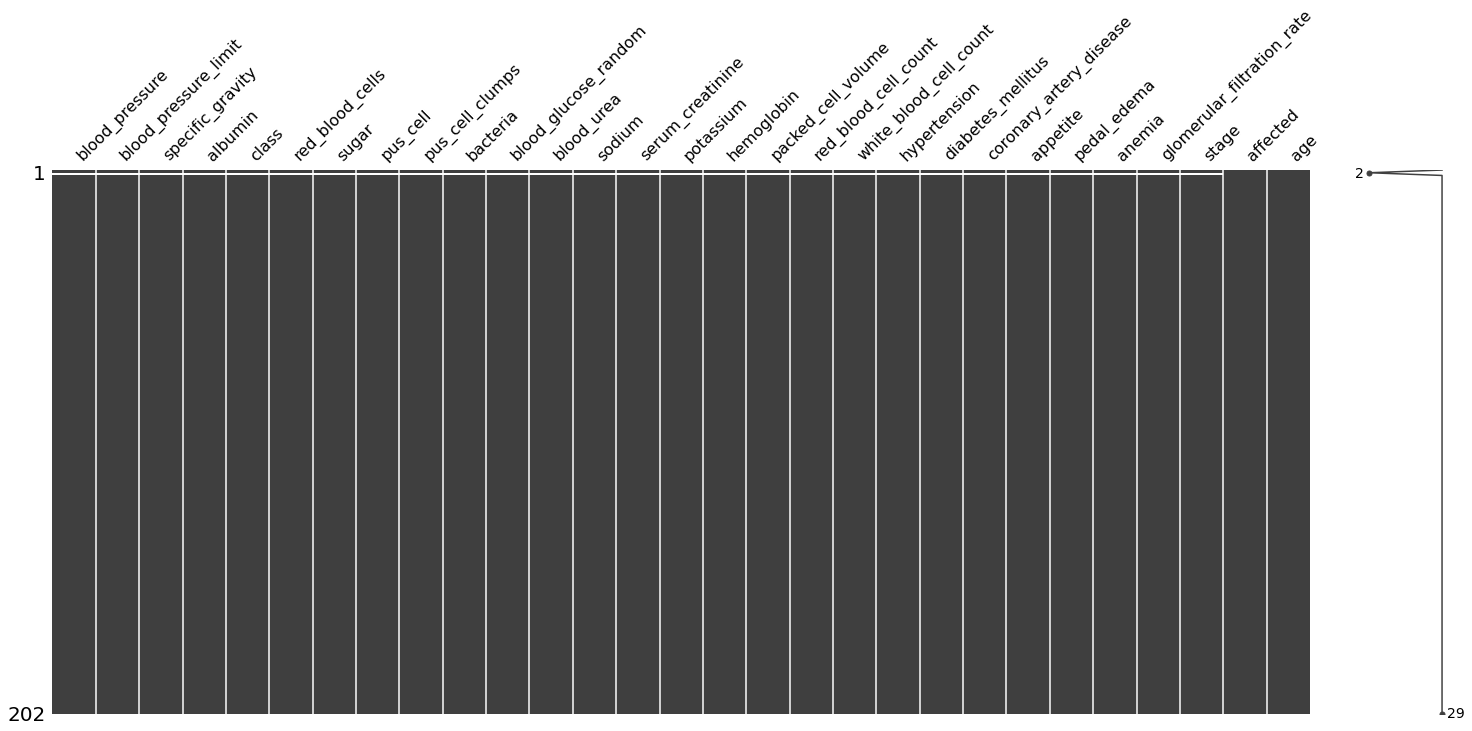

In [25]:
# Visualizing the missing data using a matrix display image
msno.matrix(kidney_data)

In [26]:
kidney_data.head()

,blood_pressure,blood_pressure_limit,specific_gravity,albumin,class,red_blood_cells,sugar,pus_cell,pus_cell_clumps,bacteria,...,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,glomerular_filtration_rate,stage,affected,age
0,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,...,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,class,meta
2,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
3,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
4,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,...,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12


In [27]:
for x in kidney_data:
    print('\nUnique Values in {} has\n{} '.format(x,kidney_data[x].value_counts()))
    print('\n')


Unique Values in blood_pressure has
1           108
0            92
discrete      1
Name: blood_pressure, dtype: int64 



Unique Values in blood_pressure_limit has
0           95
1           59
2           46
discrete     1
Name: blood_pressure_limit, dtype: int64 



Unique Values in specific_gravity has
1.019 - 1.021    75
1.009 - 1.011    45
≥ 1.023          41
1.015 - 1.017    36
< 1.007           3
discrete          1
Name: specific_gravity, dtype: int64 



Unique Values in albumin has
< 0         116
2 - 2        27
3 - 3        23
1 - 1        21
≥ 4          13
discrete      1
Name: albumin, dtype: int64 



Unique Values in class has
ckd         128
notckd       72
discrete      1
Name: class, dtype: int64 



Unique Values in red_blood_cells has
0           175
1            25
discrete      1
Name: red_blood_cells, dtype: int64 



Unique Values in sugar has
< 0         170
2 - 2         9
3 - 4         8
4 - 4         6
1 - 2         6
discrete      1
≥ 4           1
Name

In [28]:
kidney_data.drop(kidney_data.index[0], inplace=True)
kidney_data.drop(kidney_data.index[0], inplace=True)
kidney_data.head()

,blood_pressure,blood_pressure_limit,specific_gravity,albumin,class,red_blood_cells,sugar,pus_cell,pus_cell_clumps,bacteria,...,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,glomerular_filtration_rate,stage,affected,age
2,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
3,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
4,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,...,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12
5,1,1,1.009 - 1.011,3 - 3,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,127.281 - 152.446,s1,1,< 12
6,0,0,1.015 - 1.017,< 0,ckd,0,< 0,0,0,0,...,0,1,0,1,1,0,127.281 - 152.446,s1,1,12 - 20


In [29]:
# Percentage of missing data per column
(kidney_data.isnull().sum() / kidney_data.shape[0] * 100.00).round(2)

blood_pressure                0.0
blood_pressure_limit          0.0
specific_gravity              0.0
albumin                       0.0
class                         0.0
red_blood_cells               0.0
sugar                         0.0
pus_cell                      0.0
pus_cell_clumps               0.0
bacteria                      0.0
blood_glucose_random          0.0
blood_urea                    0.0
sodium                        0.0
serum_creatinine              0.0
potassium                     0.0
hemoglobin                    0.0
packed_cell_volume            0.0
red_blood_cell_count          0.0
white_blood_cell_count        0.0
hypertension                  0.0
diabetes_mellitus             0.0
coronary_artery_disease       0.0
appetite                      0.0
pedal_edema                   0.0
anemia                        0.0
glomerular_filtration_rate    0.0
stage                         0.0
affected                      0.0
age                           0.0
dtype: float64

In [30]:
# obtain some summary statistics of the columns to gauge the data quality such as missing data
kidney_data.describe(include="all").transpose()

,count,unique,top,freq
blood_pressure,200,2,1,108
blood_pressure_limit,200,3,0,95
specific_gravity,200,5,1.019 - 1.021,75
albumin,200,5,< 0,116
class,200,2,ckd,128
red_blood_cells,200,2,0,175
sugar,200,6,< 0,170
pus_cell,200,2,0,155
pus_cell_clumps,200,2,0,173
bacteria,200,2,0,189


Visualizing the descriptive features

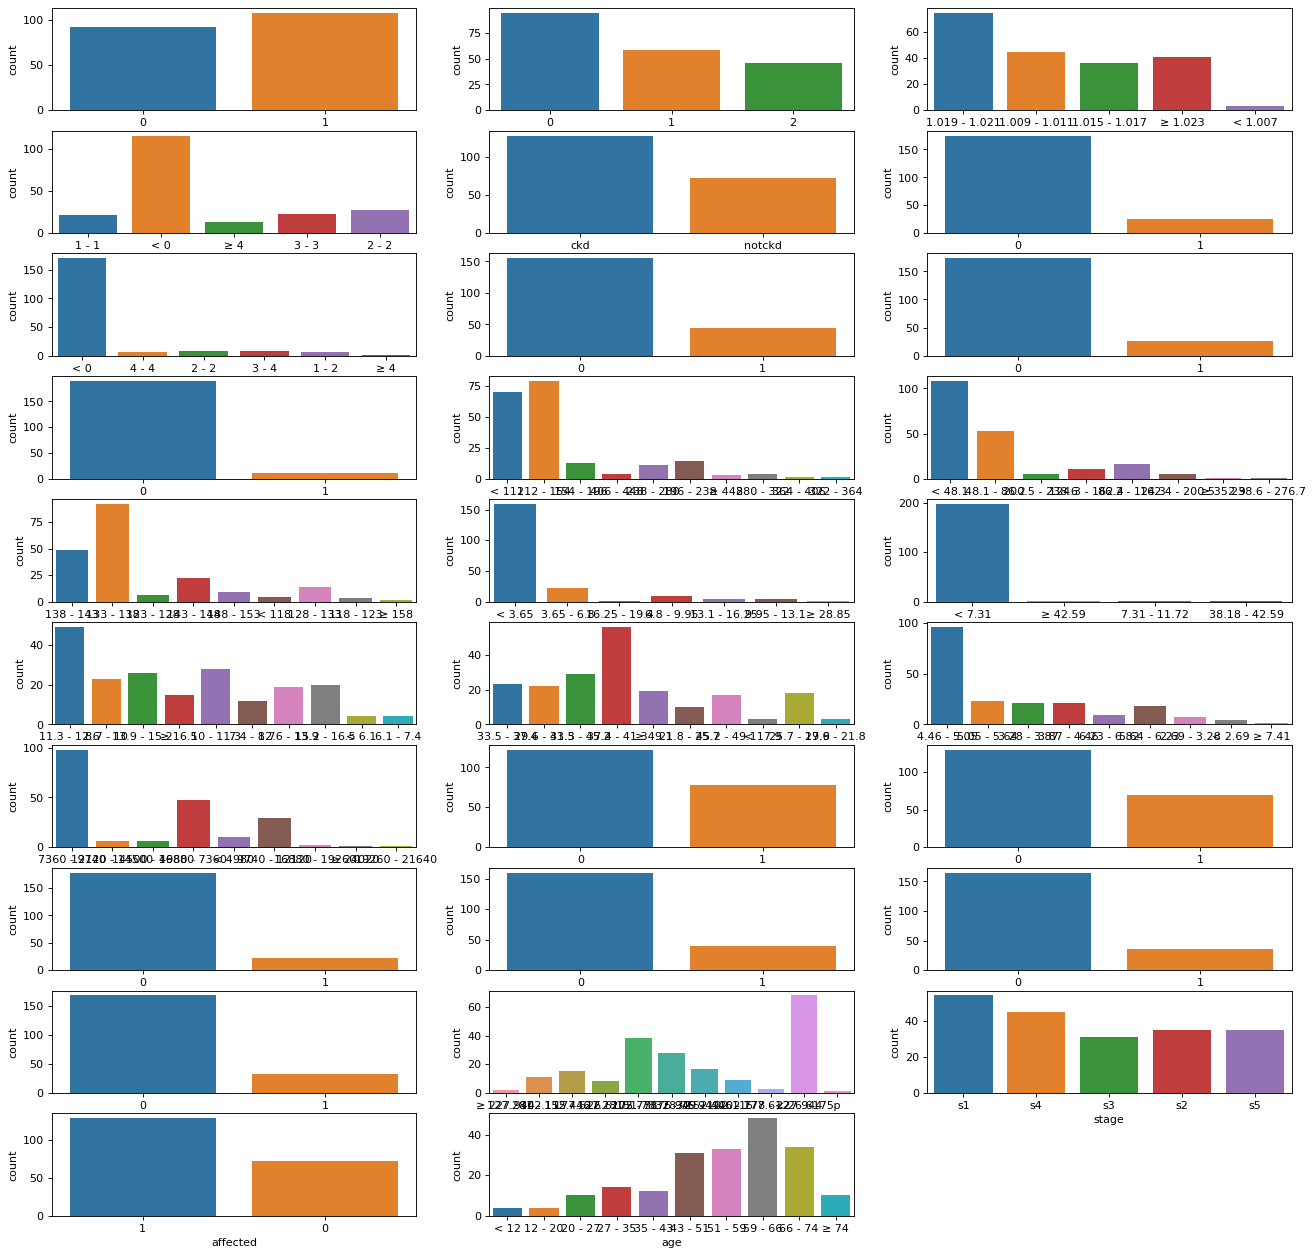

In [31]:
plt.figure(figsize=(20,20), dpi=80)

for i,feature in enumerate(kidney_data):
    plt.subplot(10,3,i+1)
    sns.countplot(kidney_data[feature])

**Blood pressure and Blood pressure limit** 

The blood pressure variables was confusing at first. However, it may mean that the two variables in indicate if the patient has blood pressure as in 0 for no and 1 for yes, and the blood pressure limit variable may indicate the stage of hypertension that the patient has.

Therefore, representation of values can either be;

Blood Pressure (Diastolic): 0 - Stage 1 hypertension (80-89), 1 - Stage 2 hypertension (90 or higher)

Blood Pressure Limit: 0 - Elevated (120-129), 1 - Stage 1 hypertension (130-139), 2 - Stage 2 hypertension (140 or higher)

#### **ELSE**

The blood pressure values relate to the systolic and diastolic value ranges in this sense. Which is similar to the first assumption



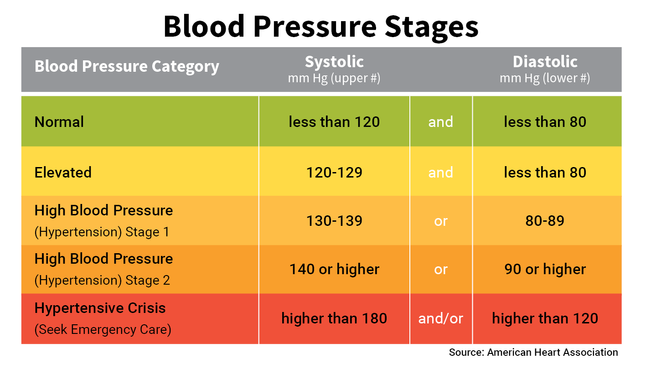

- Blood Pressure Diastolic
- Blood Pressure Limit // Blood Pressure Systolic

In which case parameter values are still unclear. A solution to this could be to remove these variables and remain only with the hypertension feature that indicates if the individual has hypertension or not.


Unique Values in blood pressure has
1    108
0     92
Name: blood_pressure, dtype: int64 




<AxesSubplot:xlabel='blood_pressure', ylabel='count'>

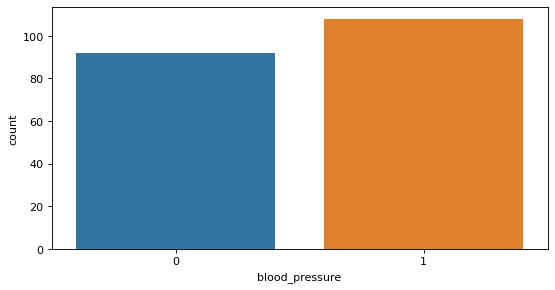

In [32]:
plt.figure(figsize=(8,4), dpi=80)

print('\nUnique Values in blood pressure has\n{} '.format(kidney_data['blood_pressure'].value_counts()))
print('\n')
sns.countplot(x = "blood_pressure", data=kidney_data)



Unique Values in blood pressure limit has
0    95
1    59
2    46
Name: blood_pressure_limit, dtype: int64 




<AxesSubplot:xlabel='blood_pressure_limit', ylabel='count'>

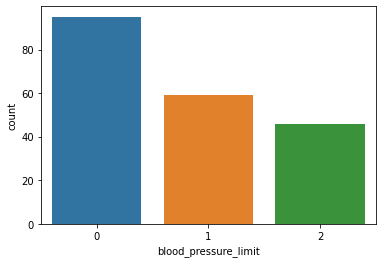

In [33]:
print('\nUnique Values in blood pressure limit has\n{} '.format(kidney_data['blood_pressure_limit'].value_counts()))
print('\n')
sns.countplot(x = "blood_pressure_limit", data=kidney_data)


Unique Values in hypertension has
0    122
1     78
Name: hypertension, dtype: int64 




<AxesSubplot:xlabel='hypertension', ylabel='count'>

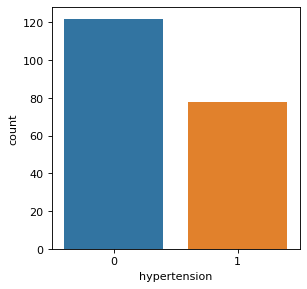

In [34]:
print('\nUnique Values in hypertension has\n{} '.format(kidney_data['hypertension'].value_counts()))
print('\n')

plt.figure(figsize=(4,4), dpi=80)
sns.countplot(x = "hypertension", data=kidney_data)


Unique Values in specific gravity has
1.019 - 1.021    75
1.009 - 1.011    45
≥ 1.023          41
1.015 - 1.017    36
< 1.007           3
Name: specific_gravity, dtype: int64 




<AxesSubplot:xlabel='specific_gravity', ylabel='count'>

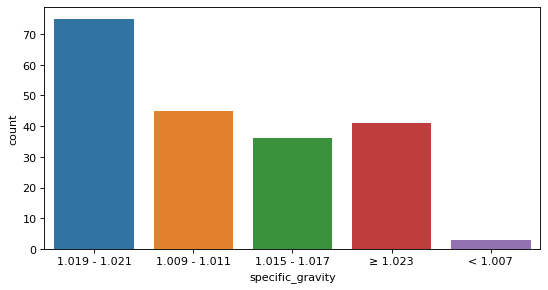

In [35]:
print('\nUnique Values in specific gravity has\n{} '.format(kidney_data['specific_gravity'].value_counts()))
print('\n')
plt.figure(figsize=(8,4), dpi=80)
sns.countplot(x = "specific_gravity", data=kidney_data)


Unique Values in albumin has
< 0      116
2 - 2     27
3 - 3     23
1 - 1     21
≥ 4       13
Name: albumin, dtype: int64 




<AxesSubplot:xlabel='albumin', ylabel='count'>

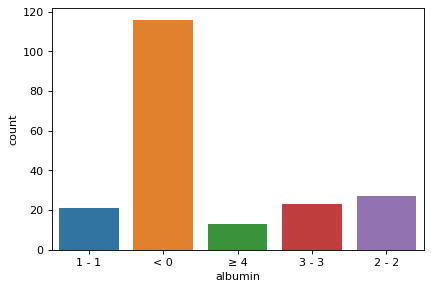

In [36]:
print('\nUnique Values in albumin has\n{} '.format(kidney_data['albumin'].value_counts()))
print('\n')

plt.figure(figsize=(6,4), dpi=80)
sns.countplot(x = "albumin", data=kidney_data)

**Red blood cells**

Representation of values can either be;
- 0 for Normal
- 1 for Abnormal


Unique Values in red blood cells has
0    175
1     25
Name: red_blood_cells, dtype: int64 




<AxesSubplot:xlabel='red_blood_cells', ylabel='count'>

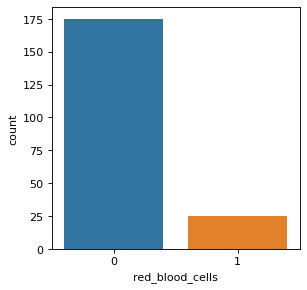

In [37]:
print('\nUnique Values in red blood cells has\n{} '.format(kidney_data['red_blood_cells'].value_counts()))
print('\n')

plt.figure(figsize=(4,4), dpi=80)
sns.countplot(x = "red_blood_cells", data=kidney_data)


Unique Values in sugar has
< 0      170
2 - 2      9
3 - 4      8
4 - 4      6
1 - 2      6
≥ 4        1
Name: sugar, dtype: int64 




<AxesSubplot:xlabel='sugar', ylabel='count'>

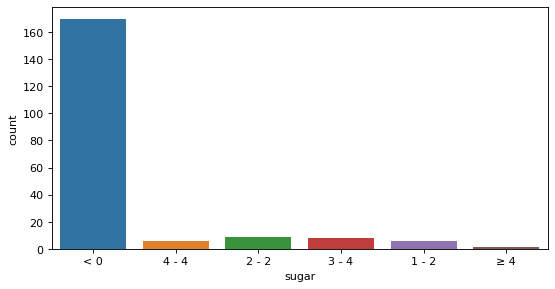

In [38]:
print('\nUnique Values in sugar has\n{} '.format(kidney_data['sugar'].value_counts()))
print('\n')

plt.figure(figsize=(8,4), dpi=80)
sns.countplot(x = "sugar", data=kidney_data)

**Pus cells**

Representation of values can either be;
- 0 for Normal
- 1 for Abnormal


Unique Values in pus cell has
0    155
1     45
Name: pus_cell, dtype: int64 




<AxesSubplot:xlabel='pus_cell', ylabel='count'>

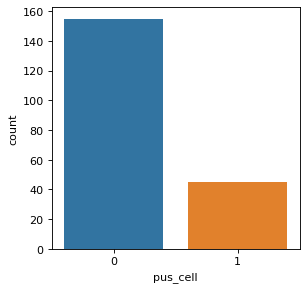

In [39]:
print('\nUnique Values in pus cell has\n{} '.format(kidney_data['pus_cell'].value_counts()))
print('\n')

plt.figure(figsize=(4,4), dpi=80)
sns.countplot(x = "pus_cell", data=kidney_data)

**Pus cells clumps**

Representation of values can either be;
- 0 for Not present
- 1 for Present


Unique Values in pus cell clumps has
0    173
1     27
Name: pus_cell_clumps, dtype: int64 




<AxesSubplot:xlabel='pus_cell_clumps', ylabel='count'>

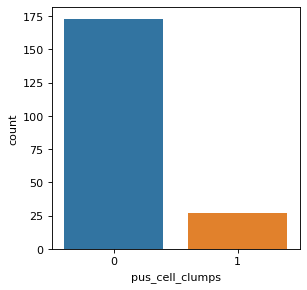

In [40]:
print('\nUnique Values in pus cell clumps has\n{} '.format(kidney_data['pus_cell_clumps'].value_counts()))
print('\n')

plt.figure(figsize=(4,4), dpi=80)
sns.countplot(x = "pus_cell_clumps", data=kidney_data)

**Bacteria**

Representation of values can either be;
- 0 for Not present
- 1 for Present


Unique Values in bacteria has
0    189
1     11
Name: bacteria, dtype: int64 




<AxesSubplot:xlabel='bacteria', ylabel='count'>

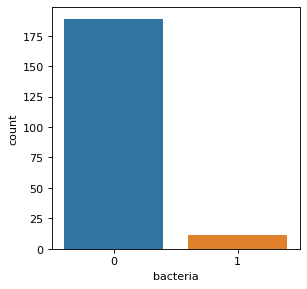

In [41]:
print('\nUnique Values in bacteria has\n{} '.format(kidney_data['bacteria'].value_counts()))
print('\n')

plt.figure(figsize=(4,4), dpi=80)
sns.countplot(x = "bacteria", data=kidney_data)


Unique Values in blood glucose random has
112 - 154    79
< 112        70
196 - 238    14
154 - 196    13
238 - 280    11
406 - 448     4
280 - 322     4
≥ 448         3
364 - 406     1
322 - 364     1
Name: blood_glucose_random, dtype: int64 




<AxesSubplot:xlabel='blood_glucose_random', ylabel='count'>

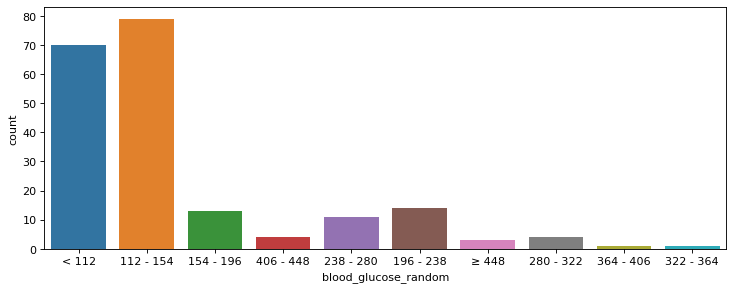

In [42]:
print('\nUnique Values in blood glucose random has\n{} '.format(kidney_data['blood_glucose_random'].value_counts()))
print('\n')

plt.figure(figsize=(11,4), dpi=80)
sns.countplot(x = "blood_glucose_random", data=kidney_data)


Unique Values in blood urea has
< 48.1           108
48.1 - 86.2       53
86.2 - 124.3      16
124.3 - 162.4     11
200.5 - 238.6      5
162.4 - 200.5      5
≥ 352.9            1
238.6 - 276.7      1
Name: blood_urea, dtype: int64 




<AxesSubplot:xlabel='blood_urea', ylabel='count'>

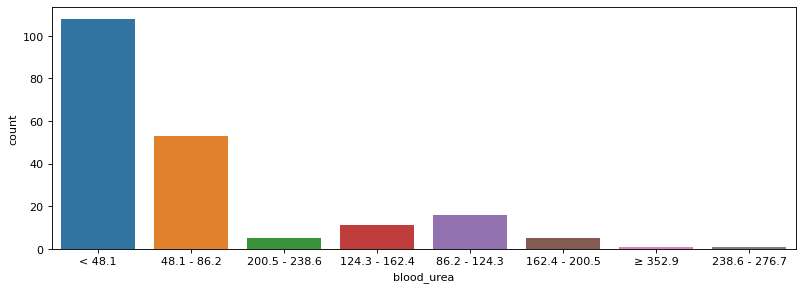

In [43]:
print('\nUnique Values in blood urea has\n{} '.format(kidney_data['blood_urea'].value_counts()))
print('\n')

plt.figure(figsize=(12,4), dpi=80)
sns.countplot(x = "blood_urea", data=kidney_data)

**Blood Sodium** 

Normal blood sodium levels are within the **range of 135 - 145 mEq/L**. Blood sodium values outside of the normal range can indicate kidney dysfunction, dehydration, or other medical issues. A disruption in the balance of sodium results in hypovolemia or hypervolemia whilst water balance disruption can be diagnosed as a condition called hyponatremia when the blood sodium levels deprecate below 135 mEq/L and hypernatremia when the blood sodium levels elevate above 145 mEq/L 


Unique Values in sodium has
133 - 138    92
138 - 143    49
143 - 148    22
128 - 133    14
148 - 153     9
123 - 128     6
< 118         4
118 - 123     3
≥ 158         1
Name: sodium, dtype: int64 




<AxesSubplot:xlabel='sodium', ylabel='count'>

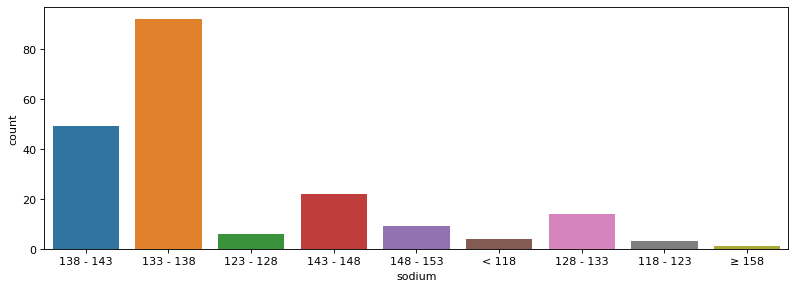

In [44]:
print('\nUnique Values in sodium has\n{} '.format(kidney_data['sodium'].value_counts()))
print('\n')

plt.figure(figsize=(12,4), dpi=80)
sns.countplot(x = "sodium", data=kidney_data)

**Serum creatinine**  
Normal value ranges:

- For adult men, 0.74 to 1.35 mg/dL (65.4 to 119.3 micromoles/L)

- For adult women, 0.59 to 1.04 mg/dL (52.2 to 91.9 micromoles/L)

Values in dataset are considered abnormals values or inconsistent with what is to be expected. Even the lowest limit of < 3.65


Unique Values in serum_creatinine has
< 3.65          159
3.65 - 6.8       22
6.8 - 9.95        9
13.1 - 16.25      4
9.95 - 13.1       4
16.25 - 19.4      1
≥ 28.85           1
Name: serum_creatinine, dtype: int64 




<AxesSubplot:xlabel='serum_creatinine', ylabel='count'>

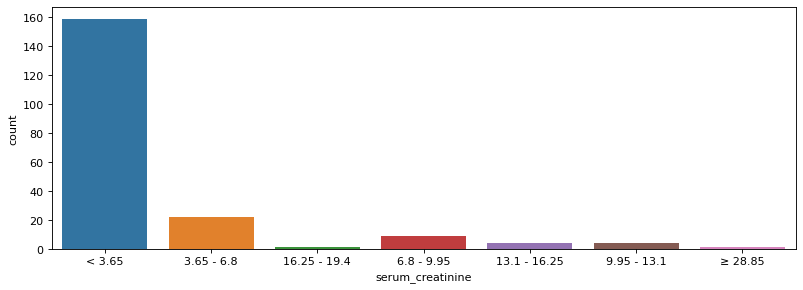

In [45]:
print('\nUnique Values in serum_creatinine has\n{} '.format(kidney_data['serum_creatinine'].value_counts()))
print('\n')

plt.figure(figsize=(12,4), dpi=80)
sns.countplot(x = "serum_creatinine", data=kidney_data)

**Potassium**

The normal range of potassium in the human body is between 3.5 - 5.2 mEq/L (3.5 - 5.2 mmol/L). 

The presence of excess unfiltered potassium results in a condition called hyperkalemia, whilst an excessive low potassium level results in a condition called hypokalemia.

Hyperkalemia is a common condition present in CKD patients 


Unique Values in potassium has
< 7.31           197
≥ 42.59            1
7.31 - 11.72       1
38.18 - 42.59      1
Name: potassium, dtype: int64 




<AxesSubplot:xlabel='potassium', ylabel='count'>

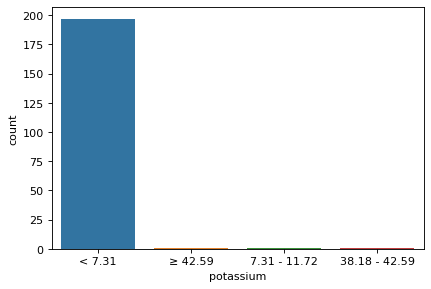

In [46]:
print('\nUnique Values in potassium has\n{} '.format(kidney_data['potassium'].value_counts()))
print('\n')

plt.figure(figsize=(6,4), dpi=80)
sns.countplot(x = "potassium", data=kidney_data)


Unique Values in hemoglobin has
11.3 - 12.6    49
10 - 11.3      28
13.9 - 15.2    26
8.7 - 10       23
15.2 - 16.5    20
12.6 - 13.9    19
≥ 16.5         15
7.4 - 8.7      12
< 6.1           4
6.1 - 7.4       4
Name: hemoglobin, dtype: int64 




<AxesSubplot:xlabel='hemoglobin', ylabel='count'>

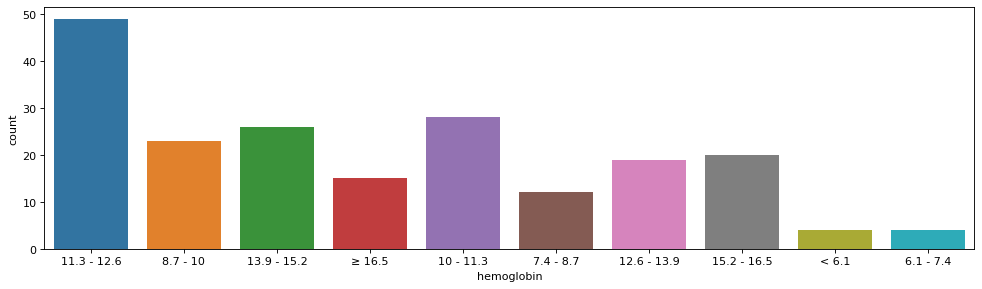

In [47]:
print('\nUnique Values in hemoglobin has\n{} '.format(kidney_data['hemoglobin'].value_counts()))
print('\n')

plt.figure(figsize=(15,4), dpi=80)
sns.countplot(x = "hemoglobin", data=kidney_data)


Unique Values in packed cell volume has
37.4 - 41.3    56
41.3 - 45.2    29
33.5 - 37.4    23
29.6 - 33.5    22
≥ 49.1         19
25.7 - 29.6    18
45.2 - 49.1    17
21.8 - 25.7    10
< 17.9          3
17.9 - 21.8     3
Name: packed_cell_volume, dtype: int64 




<AxesSubplot:xlabel='packed_cell_volume', ylabel='count'>

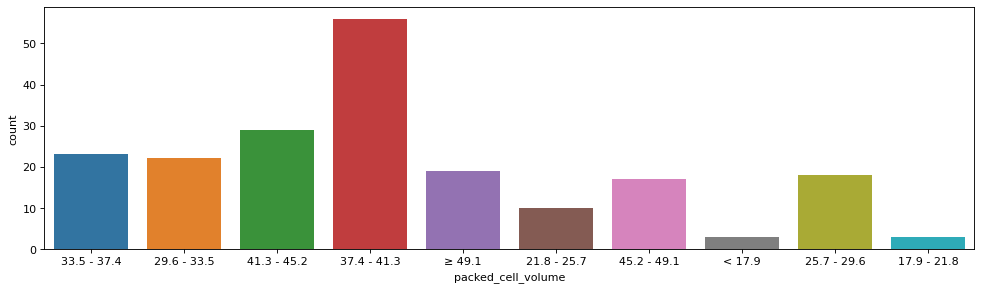

In [48]:
print('\nUnique Values in packed cell volume has\n{} '.format(kidney_data['packed_cell_volume'].value_counts()))
print('\n')

plt.figure(figsize=(15,4), dpi=80)
sns.countplot(x = "packed_cell_volume", data=kidney_data)


Unique Values in red blood cell count has
4.46 - 5.05    96
5.05 - 5.64    23
3.28 - 3.87    21
3.87 - 4.46    21
5.64 - 6.23    18
6.23 - 6.82     9
2.69 - 3.28     7
< 2.69          4
≥ 7.41          1
Name: red_blood_cell_count, dtype: int64 




<AxesSubplot:xlabel='red_blood_cell_count', ylabel='count'>

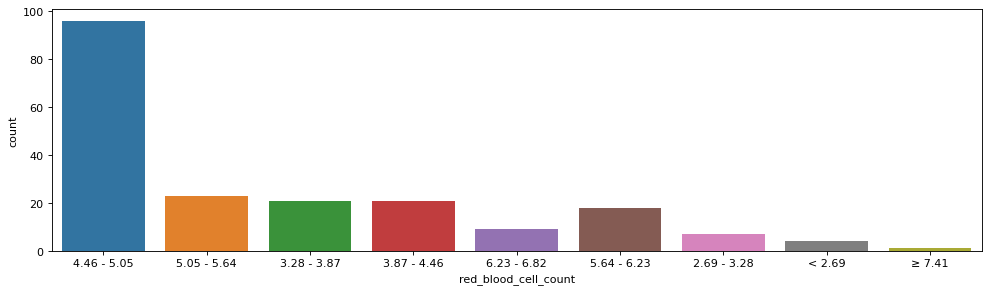

In [49]:
print('\nUnique Values in red blood cell count has\n{} '.format(kidney_data['red_blood_cell_count'].value_counts()))
print('\n')

plt.figure(figsize=(15,4), dpi=80)
sns.countplot(x = "red_blood_cell_count", data=kidney_data)


Unique Values in white blood cell count has
7360 - 9740      98
4980 - 7360      47
9740 - 12120     29
< 4980           10
12120 - 14500     6
14500 - 16880     6
16880 - 19260     2
≥ 24020           1
19260 - 21640     1
Name: white_blood_cell_count, dtype: int64 




<AxesSubplot:xlabel='white_blood_cell_count', ylabel='count'>

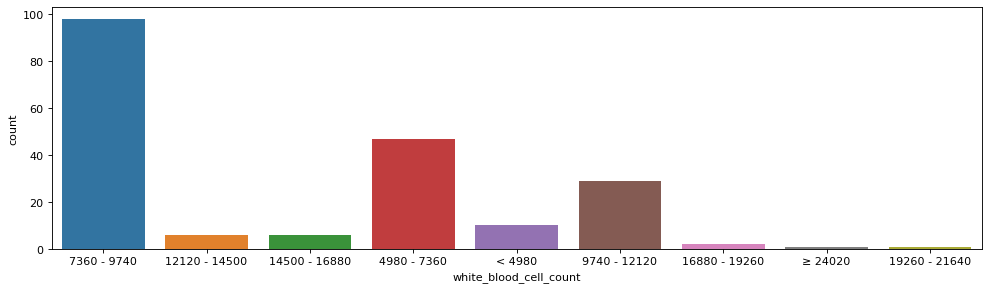

In [50]:
print('\nUnique Values in white blood cell count has\n{} '.format(kidney_data['white_blood_cell_count'].value_counts()))
print('\n')

plt.figure(figsize=(15,4), dpi=80)
sns.countplot(x = "white_blood_cell_count", data=kidney_data)


Unique Values in diabetes mellitus has
0    130
1     70
Name: diabetes_mellitus, dtype: int64 




<AxesSubplot:xlabel='diabetes_mellitus', ylabel='count'>

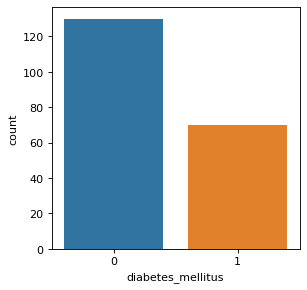

In [51]:
print('\nUnique Values in diabetes mellitus has\n{} '.format(kidney_data['diabetes_mellitus'].value_counts()))
print('\n')

plt.figure(figsize=(4,4), dpi=80)
sns.countplot(x = "diabetes_mellitus", data=kidney_data)


Unique Values in coronary artery disease limit has
0    178
1     22
Name: coronary_artery_disease, dtype: int64 




<AxesSubplot:xlabel='coronary_artery_disease', ylabel='count'>

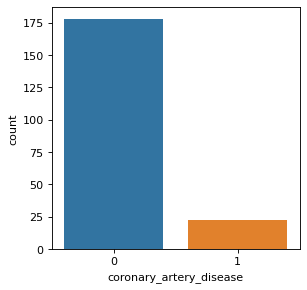

In [52]:
print('\nUnique Values in coronary artery disease limit has\n{} '.format(kidney_data['coronary_artery_disease'].value_counts()))
print('\n')

plt.figure(figsize=(4,4), dpi=80)
sns.countplot(x = "coronary_artery_disease", data=kidney_data)


Unique Values in appetite limit has
0    160
1     40
Name: appetite, dtype: int64 




<AxesSubplot:xlabel='appetite', ylabel='count'>

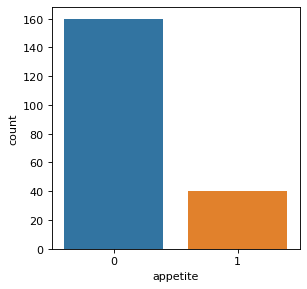

In [53]:
print('\nUnique Values in appetite limit has\n{} '.format(kidney_data['appetite'].value_counts()))
print('\n')

plt.figure(figsize=(4,4), dpi=80)
sns.countplot(x = "appetite", data=kidney_data)


Unique Values in pedal edema limit has
0    165
1     35
Name: pedal_edema, dtype: int64 




<AxesSubplot:xlabel='pedal_edema', ylabel='count'>

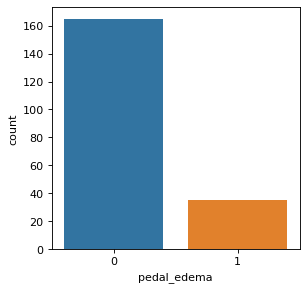

In [54]:
print('\nUnique Values in pedal edema limit has\n{} '.format(kidney_data['pedal_edema'].value_counts()))
print('\n')

plt.figure(figsize=(4,4), dpi=80)
sns.countplot(x = "pedal_edema", data=kidney_data)


Unique Values in anemia limit has
0    168
1     32
Name: anemia, dtype: int64 




<AxesSubplot:xlabel='anemia', ylabel='count'>

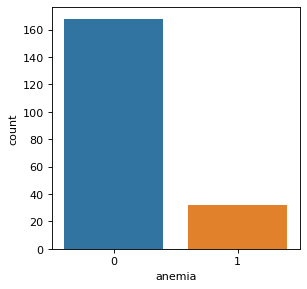

In [55]:
print('\nUnique Values in anemia limit has\n{} '.format(kidney_data['anemia'].value_counts()))
print('\n')

plt.figure(figsize=(4,4), dpi=80)
sns.countplot(x = "anemia", data=kidney_data)

#### Glomerular Filtration Rate


Unique Values in GFR limit has
< 26.6175            68
26.6175 - 51.7832    38
51.7832 - 76.949     28
76.949 - 102.115     17
102.115 - 127.281    15
127.281 - 152.446    11
152.446 - 177.612     9
177.612 - 202.778     8
202.778 - 227.944     3
≥ 227.944             2
 p                    1
Name: glomerular_filtration_rate, dtype: int64 




<AxesSubplot:xlabel='glomerular_filtration_rate', ylabel='count'>

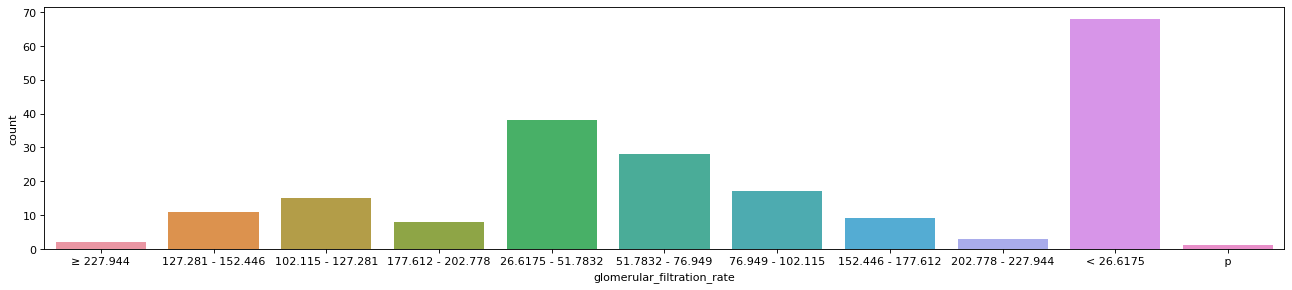

In [56]:
print('\nUnique Values in GFR limit has\n{} '.format(kidney_data['glomerular_filtration_rate'].value_counts()))
print('\n')

plt.figure(figsize=(20,4), dpi=80)
sns.countplot(x = "glomerular_filtration_rate", data=kidney_data)

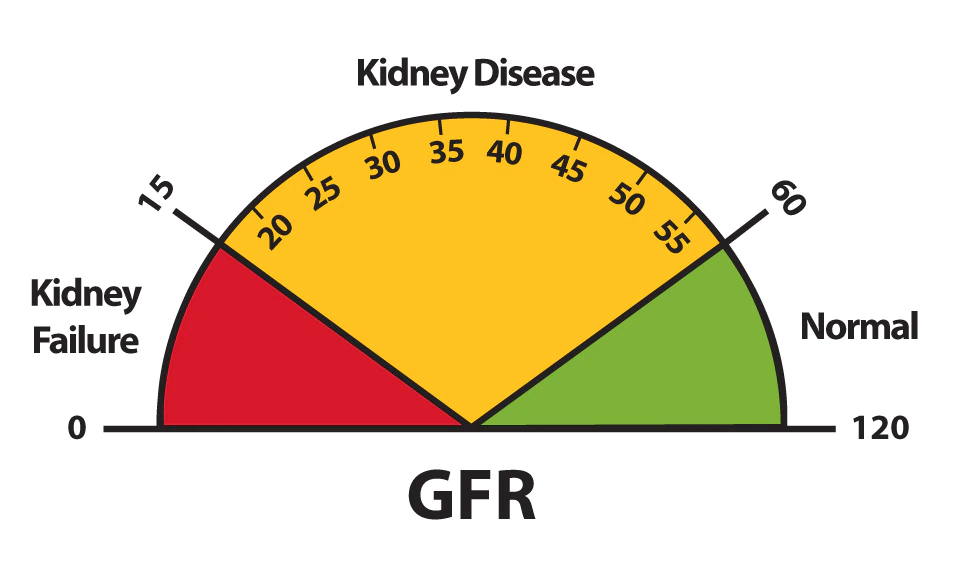

Thus, according to the recorded values, the following are considered in the orange zone to the green zone:
- 51.7832 - 76.949
- 26.6175 - 51.7832

The following are considered to be in the red zone to the orange zone:
- < 26.6175


Unique Values in stage limit has
s1    54
s4    45
s2    35
s5    35
s3    31
Name: stage, dtype: int64 




<AxesSubplot:xlabel='stage', ylabel='count'>

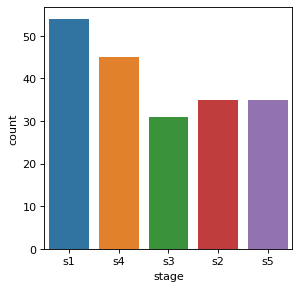

In [57]:
print('\nUnique Values in stage limit has\n{} '.format(kidney_data['stage'].value_counts()))
print('\n')

plt.figure(figsize=(4,4), dpi=80)
sns.countplot(x = "stage", data=kidney_data)


Unique Values in affected limit has
1    128
0     72
Name: affected, dtype: int64 




<AxesSubplot:xlabel='affected', ylabel='count'>

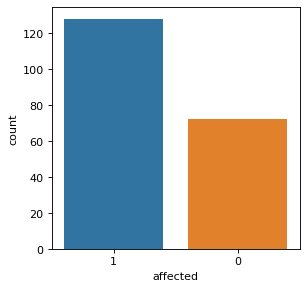

In [58]:
print('\nUnique Values in affected limit has\n{} '.format(kidney_data['affected'].value_counts()))
print('\n')

plt.figure(figsize=(4,4), dpi=80)
sns.countplot(x = "affected", data=kidney_data)


Unique Values in age limit has
59 - 66    48
66 - 74    34
51 - 59    33
43 - 51    31
27 - 35    14
35 - 43    12
20 - 27    10
≥ 74       10
< 12        4
12 - 20     4
Name: age, dtype: int64 




<AxesSubplot:xlabel='age', ylabel='count'>

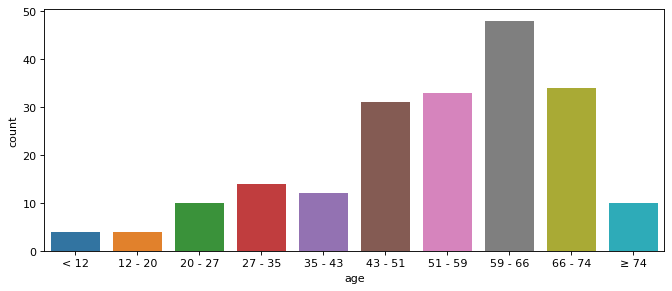

In [59]:
print('\nUnique Values in age limit has\n{} '.format(kidney_data['age'].value_counts()))
print('\n')

plt.figure(figsize=(10,4), dpi=80)
sns.countplot(x = "age", data=kidney_data)


Unique Values in class limit has
ckd       128
notckd     72
Name: class, dtype: int64 




<AxesSubplot:xlabel='class', ylabel='count'>

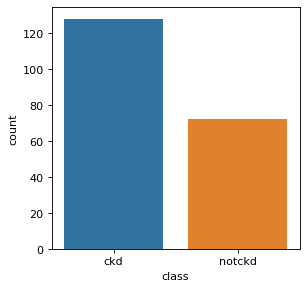

In [60]:
print('\nUnique Values in class limit has\n{} '.format(kidney_data['class'].value_counts()))
print('\n')

plt.figure(figsize=(4,4), dpi=80)
sns.countplot(x = "class", data=kidney_data)

Feature engineering

In [61]:
kidney_df1 = kidney_data.copy()

In [62]:
kidney_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 2 to 201
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   blood_pressure              200 non-null    object
 1   blood_pressure_limit        200 non-null    object
 2   specific_gravity            200 non-null    object
 3   albumin                     200 non-null    object
 4   class                       200 non-null    object
 5   red_blood_cells             200 non-null    object
 6   sugar                       200 non-null    object
 7   pus_cell                    200 non-null    object
 8   pus_cell_clumps             200 non-null    object
 9   bacteria                    200 non-null    object
 10  blood_glucose_random        200 non-null    object
 11  blood_urea                  200 non-null    object
 12  sodium                      200 non-null    object
 13  serum_creatinine            200 non-null    object

In [63]:
print('Before changing the variables according to order', kidney_data['specific_gravity'].unique())

kidney_df1['specific_gravity']=kidney_df1['specific_gravity'].map({'< 1.007':0,'1.009 - 1.011':1,'1.015 - 1.017':2,
                                                                   '1.019 - 1.021':3,'≥ 1.023':4})
print('After changing the variables according to order', kidney_df1['specific_gravity'].unique())

Before changing the variables according to order ['1.019 - 1.021' '1.009 - 1.011' '1.015 - 1.017' '≥ 1.023' '< 1.007']
After changing the variables according to order [3 1 2 4 0]


In [64]:
print('Before changing the variables according to order', kidney_data['albumin'].unique())

kidney_df1['albumin']=kidney_df1['albumin'].map({'< 0':0,'1 - 1':1,'2 - 2':2,'3 - 3':3,'≥ 4':4})
print('After changing the variables according to order', kidney_df1['albumin'].unique())

Before changing the variables according to order ['1 - 1' '< 0' '≥ 4' '3 - 3' '2 - 2']
After changing the variables according to order [1 0 4 3 2]


In [65]:
print('Before changing the variables according to order', kidney_data['sugar'].unique())

kidney_df1['sugar']=kidney_df1['sugar'].map({'< 0':0,'1 - 2':1,'2 - 2':2,
                                                                   '3 - 4':3,'4 - 4':4, '≥ 4':5})
print('After changing the variables according to order', kidney_df1['sugar'].unique())

Before changing the variables according to order ['< 0' '4 - 4' '2 - 2' '3 - 4' '1 - 2' '≥ 4']
After changing the variables according to order [0 4 2 3 1 5]


In [66]:
print('Before changing the variables according to order', kidney_data['blood_glucose_random'].unique())

kidney_df1['blood_glucose_random']=kidney_df1['blood_glucose_random'].map({'< 112':0,'112 - 154':1,'154 - 196':2,
                                                                   '196 - 238':3,'238 - 280':4,'280 - 322':5,
                                                                   '322 - 364':6,'364 - 406':7,'406 - 448':8,'≥ 448':9})
print('After changing the variables according to order', kidney_df1['blood_glucose_random'].unique())

Before changing the variables according to order ['< 112' '112 - 154' '154 - 196' '406 - 448' '238 - 280' '196 - 238'
 '≥ 448' '280 - 322' '364 - 406' '322 - 364']
After changing the variables according to order [0 1 2 8 4 3 9 5 7 6]


In [67]:
print('Before changing the variables according to order', kidney_data['blood_urea'].unique())

kidney_df1['blood_urea']=kidney_df1['blood_urea'].map({'< 48.1':0,'48.1 - 86.2':1,'86.2 - 124.3':2,
                                                                   '124.3 - 162.4':3,'162.4 - 200.5':4,'200.5 - 238.6':5,
                                                                   '238.6 - 276.7':6,'≥ 352.9':7})
print('After changing the variables according to order', kidney_df1['blood_urea'].unique())
# why is there no value between 276 and 352?

Before changing the variables according to order ['< 48.1' '48.1 - 86.2' '200.5 - 238.6' '124.3 - 162.4' '86.2 - 124.3'
 '162.4 - 200.5' '≥ 352.9' '238.6 - 276.7']
After changing the variables according to order [0 1 5 3 2 4 7 6]


In [68]:
print('Before changing the variables according to order', kidney_data['sodium'].unique())

kidney_df1['sodium']=kidney_df1['sodium'].map({'< 118':0,'118 - 123':1,'123 - 128':2,
                                                                   '128 - 133':3,'133 - 138':4,'138 - 143':5,
                                                                   '143 - 148':6,'148 - 153':7,'≥ 158':8})
print('After changing the variables according to order', kidney_df1['sodium'].unique())
# why is there no value between 153 and 158?

Before changing the variables according to order ['138 - 143' '133 - 138' '123 - 128' '143 - 148' '148 - 153' '< 118'
 '128 - 133' '118 - 123' '≥ 158']
After changing the variables according to order [5 4 2 6 7 0 3 1 8]


In [69]:
print('Before changing the variables according to order', kidney_data['serum_creatinine'].unique())

kidney_df1['serum_creatinine']=kidney_df1['serum_creatinine'].map({'< 3.65':0,'3.65 - 6.8':1,'6.8 - 9.95':2,
                                                                   '9.95 - 13.1':3,'13.1 - 16.25':4,'16.25 - 19.4':5,
                                                                   '≥ 28.85':6})
print('After changing the variables according to order', kidney_df1['serum_creatinine'].unique())
# no value range between 19 and 28

Before changing the variables according to order ['< 3.65' '3.65 - 6.8' '16.25 - 19.4' '6.8 - 9.95' '13.1 - 16.25'
 '9.95 - 13.1' '≥ 28.85']
After changing the variables according to order [0 1 5 2 4 3 6]


In [70]:
print('Before changing the variables according to order', kidney_data['hemoglobin'].unique())

kidney_df1['hemoglobin']=kidney_df1['hemoglobin'].map({'< 6.1':0,'6.1 - 7.4':1,'7.4 - 8.7':2,
                                                                   '8.7 - 10':3,'10 - 11.3':4,'11.3 - 12.6':5,
                                                                   '12.6 - 13.9':6,'13.9 - 15.2':7,'15.2 - 16.5':8,
                                                                  '≥ 16.5':9})
print('After changing the variables according to order', kidney_df1['hemoglobin'].unique())

Before changing the variables according to order ['11.3 - 12.6' '8.7 - 10' '13.9 - 15.2' '≥ 16.5' '10 - 11.3' '7.4 - 8.7'
 '12.6 - 13.9' '15.2 - 16.5' '< 6.1' '6.1 - 7.4']
After changing the variables according to order [5 3 7 9 4 2 6 8 0 1]


In [71]:
print('Before changing the variables according to order', kidney_data['packed_cell_volume'].unique())

kidney_df1['packed_cell_volume']=kidney_df1['packed_cell_volume'].map({'< 17.9':0,'17.9 - 21.8':1,'21.8 - 25.7':2,
                                                                   '25.7 - 29.6':3,'29.6 - 33.5':4,'33.5 - 37.4':5,
                                                                   '37.4 - 41.3':6,'41.3 - 45.2':7,'45.2 - 49.1':8,
                                                                  '≥ 49.1':9})
print('After changing the variables according to order', kidney_df1['packed_cell_volume'].unique())

Before changing the variables according to order ['33.5 - 37.4' '29.6 - 33.5' '41.3 - 45.2' '37.4 - 41.3' '≥ 49.1'
 '21.8 - 25.7' '45.2 - 49.1' '< 17.9' '25.7 - 29.6' '17.9 - 21.8']
After changing the variables according to order [5 4 7 6 9 2 8 0 3 1]


In [72]:
print('Before changing the variables according to order', kidney_data['red_blood_cell_count'].unique())

kidney_df1['red_blood_cell_count']=kidney_df1['red_blood_cell_count'].map({'< 2.69':0,'2.69 - 3.28':1,'3.28 - 3.87':2,
                                                                   '3.87 - 4.46':3,'4.46 - 5.05':4,'5.05 - 5.64':5,
                                                                   '5.64 - 6.23':6,'6.23 - 6.82':7,'≥ 7.41':8})
print('After changing the variables according to order', kidney_df1['red_blood_cell_count'].unique())

Before changing the variables according to order ['4.46 - 5.05' '5.05 - 5.64' '3.28 - 3.87' '3.87 - 4.46' '6.23 - 6.82'
 '5.64 - 6.23' '2.69 - 3.28' '< 2.69' '≥ 7.41']
After changing the variables according to order [4 5 2 3 7 6 1 0 8]


In [73]:
print('Before changing the variables according to order', kidney_data['white_blood_cell_count'].unique())

kidney_df1['white_blood_cell_count']=kidney_df1['white_blood_cell_count'].map({'< 4980':0,'4980 - 7360':1,'7360 - 9740':2,
                                                                   '9740 - 12120':3,'12120 - 14500':4,'14500 - 16880':5,
                                                                   '16880 - 19260':6,'19260 - 21640':7,'≥ 24020':8})
print('After changing the variables according to order', kidney_df1['white_blood_cell_count'].unique())

Before changing the variables according to order ['7360 - 9740' '12120 - 14500' '14500 - 16880' '4980 - 7360' '< 4980'
 '9740 - 12120' '16880 - 19260' '≥ 24020' '19260 - 21640']
After changing the variables according to order [2 4 5 1 0 3 6 8 7]


In [74]:
print('Before changing the variables according to order', kidney_data['glomerular_filtration_rate'].unique())

kidney_df1['glomerular_filtration_rate']=kidney_df1['glomerular_filtration_rate'].map({'< 26.6175':0,'26.6175 - 51.7832':1,
                                                                                       '51.7832 - 76.949':2,'76.949 - 102.115':3,
                                                                                       '102.115 - 127.281':4,
                                                                                       '127.281 - 152.446':5,'152.446 - 177.612':6,
                                                                                       '177.612 - 202.778':7,'202.778 - 227.944':8,
                                                                                       '≥ 227.944':9})
print('After changing the variables according to order', kidney_df1['glomerular_filtration_rate'].unique())

Before changing the variables according to order ['≥ 227.944' '127.281 - 152.446' '102.115 - 127.281' '177.612 - 202.778'
 '26.6175 - 51.7832' '51.7832 - 76.949' '76.949 - 102.115'
 '152.446 - 177.612' '202.778 - 227.944' '< 26.6175' ' p ']
After changing the variables according to order [ 9.  5.  4.  7.  1.  2.  3.  6.  8.  0. nan]


In [75]:
kidney_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 2 to 201
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   blood_pressure              200 non-null    object 
 1   blood_pressure_limit        200 non-null    object 
 2   specific_gravity            200 non-null    int64  
 3   albumin                     200 non-null    int64  
 4   class                       200 non-null    object 
 5   red_blood_cells             200 non-null    object 
 6   sugar                       200 non-null    int64  
 7   pus_cell                    200 non-null    object 
 8   pus_cell_clumps             200 non-null    object 
 9   bacteria                    200 non-null    object 
 10  blood_glucose_random        200 non-null    int64  
 11  blood_urea                  200 non-null    int64  
 12  sodium                      200 non-null    int64  
 13  serum_creatinine            200 non

In [76]:
# make features numeric before before feature selection
# if the aim is to make numeric

def make_numeric(kidney, columns):
    for columns in kidney:
        kidney[columns]=pd.to_numeric(kidney[columns])
    return kidney

In [62]:
print('Unique values in age', kidney_df1['age'].unique())
print('Unique values in potassium', kidney_df1['potassium'].unique())
print('Unique values in stage', kidney_df1['stage'].unique())

Unique values in age ['< 12' '12 - 20' '20 - 27' '27 - 35' '35 - 43' '43 - 51' '51 - 59'
 '59 - 66' '66 - 74' '≥ 74']
Unique values in potassium ['< 7.31' '≥ 42.59' '7.31 - 11.72' '38.18 - 42.59']
Unique values in stage ['s1' 's4' 's3' 's2' 's5']


In [63]:
#kidney_df1 = pd.get_dummies(kidney_df1)

In [77]:
age = pd.get_dummies(kidney_df1['age'])
potassium = pd.get_dummies(kidney_df1['potassium'])
stage = pd.get_dummies(kidney_df1['stage'])

In [78]:
kidney_df2 = kidney_df1.copy()

In [79]:
kidney_df2['stage'].unique()

array(['s1', 's4', 's3', 's2', 's5'], dtype=object)

In [80]:
kidney_df2['stage(s1)'] = stage['s1']
kidney_df2['stage(s2)'] = stage['s2']
kidney_df2['stage(s3)'] = stage['s3']
kidney_df2['stage(s4)'] = stage['s4']
kidney_df2['stage(s5)'] = stage['s5']

In [81]:
kidney_df2['potassium(< 7.31)'] = potassium['< 7.31']
kidney_df2['potassium(7.31 - 11.72)'] = potassium['7.31 - 11.72']
kidney_df2['potassium(38.18 - 42.59)'] = potassium['38.18 - 42.59']
kidney_df2['potassium(≥ 42.59)'] = potassium['≥ 42.59']

In [82]:
kidney_df2['age(12 - 20)'] = age['12 - 20']
kidney_df2['age(20 - 27)'] = age['20 - 27']
kidney_df2['age(27 - 35)'] = age['27 - 35']
kidney_df2['age(35 - 43)'] = age['35 - 43']
kidney_df2['age(43 - 51)'] = age['43 - 51']
kidney_df2['age(51 - 59)'] = age['51 - 59']
kidney_df2['age(59 - 66)'] = age['59 - 66']
kidney_df2['age(66 - 74)'] = age['66 - 74']
kidney_df2['age(< 12)'] = age['< 12']
kidney_df2['age(≥ 74)'] = age['≥ 74']

In [83]:
kidney_df2.drop(['age', 'potassium', 'stage'],axis=1,inplace=True)

In [84]:
kidney_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 2 to 201
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   blood_pressure              200 non-null    object 
 1   blood_pressure_limit        200 non-null    object 
 2   specific_gravity            200 non-null    int64  
 3   albumin                     200 non-null    int64  
 4   class                       200 non-null    object 
 5   red_blood_cells             200 non-null    object 
 6   sugar                       200 non-null    int64  
 7   pus_cell                    200 non-null    object 
 8   pus_cell_clumps             200 non-null    object 
 9   bacteria                    200 non-null    object 
 10  blood_glucose_random        200 non-null    int64  
 11  blood_urea                  200 non-null    int64  
 12  sodium                      200 non-null    int64  
 13  serum_creatinine            200 non

In [85]:
kidney_df2.head()

,blood_pressure,blood_pressure_limit,specific_gravity,albumin,class,red_blood_cells,sugar,pus_cell,pus_cell_clumps,bacteria,...,age(12 - 20),age(20 - 27),age(27 - 35),age(35 - 43),age(43 - 51),age(51 - 59),age(59 - 66),age(66 - 74),age(< 12),age(≥ 74)
2,0,0,3,1,ckd,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,ckd,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,4,ckd,1,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
5,1,1,1,3,ckd,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,0,2,0,ckd,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [86]:
# imputate the missing value in GFR
kidney_df2['glomerular_filtration_rate']=kidney_df2['glomerular_filtration_rate'].fillna(kidney_df2['glomerular_filtration_rate'].median())
kidney_df2['glomerular_filtration_rate'].unique()

array([9., 5., 4., 7., 1., 2., 3., 6., 8., 0.])

In [87]:
kidney_df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
specific_gravity,200.0,2.530,1.097782,0.0,2.0,3.0,3.0,4.0
albumin,200.0,0.980,1.329828,0.0,0.0,0.0,2.0,4.0
sugar,200.0,0.385,1.015842,0.0,0.0,0.0,0.0,5.0
blood_glucose_random,200.0,1.415,1.897572,0.0,0.0,1.0,2.0,9.0
blood_urea,200.0,0.880,1.328316,0.0,0.0,0.0,1.0,7.0
sodium,200.0,4.365,1.300087,0.0,4.0,4.0,5.0,8.0
serum_creatinine,200.0,0.395,0.971439,0.0,0.0,0.0,0.0,6.0
hemoglobin,200.0,5.225,2.155832,0.0,4.0,5.0,7.0,9.0
packed_cell_volume,200.0,5.630,2.074759,0.0,4.0,6.0,7.0,9.0
red_blood_cell_count,200.0,3.950,1.458815,0.0,3.0,4.0,5.0,8.0


Target feature is imbalanced, however, the dataset doesnt not exactly suffer from the imbalanced problem. The positive class is the majority class.

Class distribution in target feature has
ckd       128
notckd     72
Name: class, dtype: int64 


<AxesSubplot:xlabel='class', ylabel='count'>

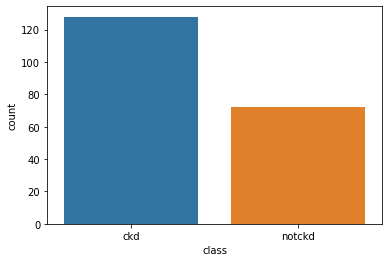

In [75]:
print('Class distribution in target feature has\n{} '.format(kidney_df2['class'].value_counts()))
sns.countplot(x = "class", data=kidney_df2)

Undersampling and Oversampling techniques

In [88]:
kidney_df3 = kidney_df2.copy()

In [89]:
kidney_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 2 to 201
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   blood_pressure              200 non-null    object 
 1   blood_pressure_limit        200 non-null    object 
 2   specific_gravity            200 non-null    int64  
 3   albumin                     200 non-null    int64  
 4   class                       200 non-null    object 
 5   red_blood_cells             200 non-null    object 
 6   sugar                       200 non-null    int64  
 7   pus_cell                    200 non-null    object 
 8   pus_cell_clumps             200 non-null    object 
 9   bacteria                    200 non-null    object 
 10  blood_glucose_random        200 non-null    int64  
 11  blood_urea                  200 non-null    int64  
 12  sodium                      200 non-null    int64  
 13  serum_creatinine            200 non

In [90]:
kidney_df3 = kidney_df3.astype({
    'stage(s1)': 'int64',
    'stage(s2)': 'int64',
    'stage(s3)': 'int64',
    'stage(s4)': 'int64',
    'stage(s5)': 'int64',
    'potassium(< 7.31)': 'int64',
    'potassium(7.31 - 11.72)': 'int64',
    'potassium(38.18 - 42.59)': 'int64',
    'potassium(≥ 42.59)': 'int64',
    'age(12 - 20)': 'int64',
    'age(20 - 27)': 'int64',
    'age(27 - 35)': 'int64',
    'age(35 - 43)': 'int64',
    'age(43 - 51)': 'int64',
    'age(51 - 59)': 'int64',
    'age(59 - 66)': 'int64',
    'age(66 - 74)': 'int64',
    'age(< 12)': 'int64',
    'age(≥ 74)': 'int64'
})

In [91]:
kidney_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 2 to 201
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   blood_pressure              200 non-null    object 
 1   blood_pressure_limit        200 non-null    object 
 2   specific_gravity            200 non-null    int64  
 3   albumin                     200 non-null    int64  
 4   class                       200 non-null    object 
 5   red_blood_cells             200 non-null    object 
 6   sugar                       200 non-null    int64  
 7   pus_cell                    200 non-null    object 
 8   pus_cell_clumps             200 non-null    object 
 9   bacteria                    200 non-null    object 
 10  blood_glucose_random        200 non-null    int64  
 11  blood_urea                  200 non-null    int64  
 12  sodium                      200 non-null    int64  
 13  serum_creatinine            200 non

In [92]:
kidney_df3['class'] = kidney_df3['class'].map({'notckd':0,'ckd':1})

In [93]:
# data split
X_df = kidney_df3.drop(['class'], axis=1)
y_df = kidney_df3['class']

In [94]:
# Oversampling with smote
print("Oversampling the data")

# summarize class distribution
print("\nBefore oversampling: ",Counter(y_df))

# define oversampling strategy
oversampling = SMOTE(random_state=42)

# fit and apply the transform
X_df_SMOTE, y_df_SMOTE = oversampling.fit_resample(X_df, y_df)

# summarize class distribution
print("After oversampling: ",Counter(y_df_SMOTE))

Oversampling the data

Before oversampling:  Counter({1: 128, 0: 72})
After oversampling:  Counter({1: 128, 0: 128})


In [95]:
# Undersampling with tomek links
print("Undersampling the data")

# summarize class distribution
print("Before undersampling: ",Counter(y_df))

# define undersampling strategy
undersample = TomekLinks()

# fit and apply the transform
X_df_TK, y_df_TK = undersample.fit_resample(X_df, y_df)

# summarize class distribution
print("After undersampling: ",Counter(y_df_TK))

Undersampling the data
Before undersampling:  Counter({1: 128, 0: 72})
After undersampling:  Counter({1: 127, 0: 72})


Feature Selection

<AxesSubplot:>

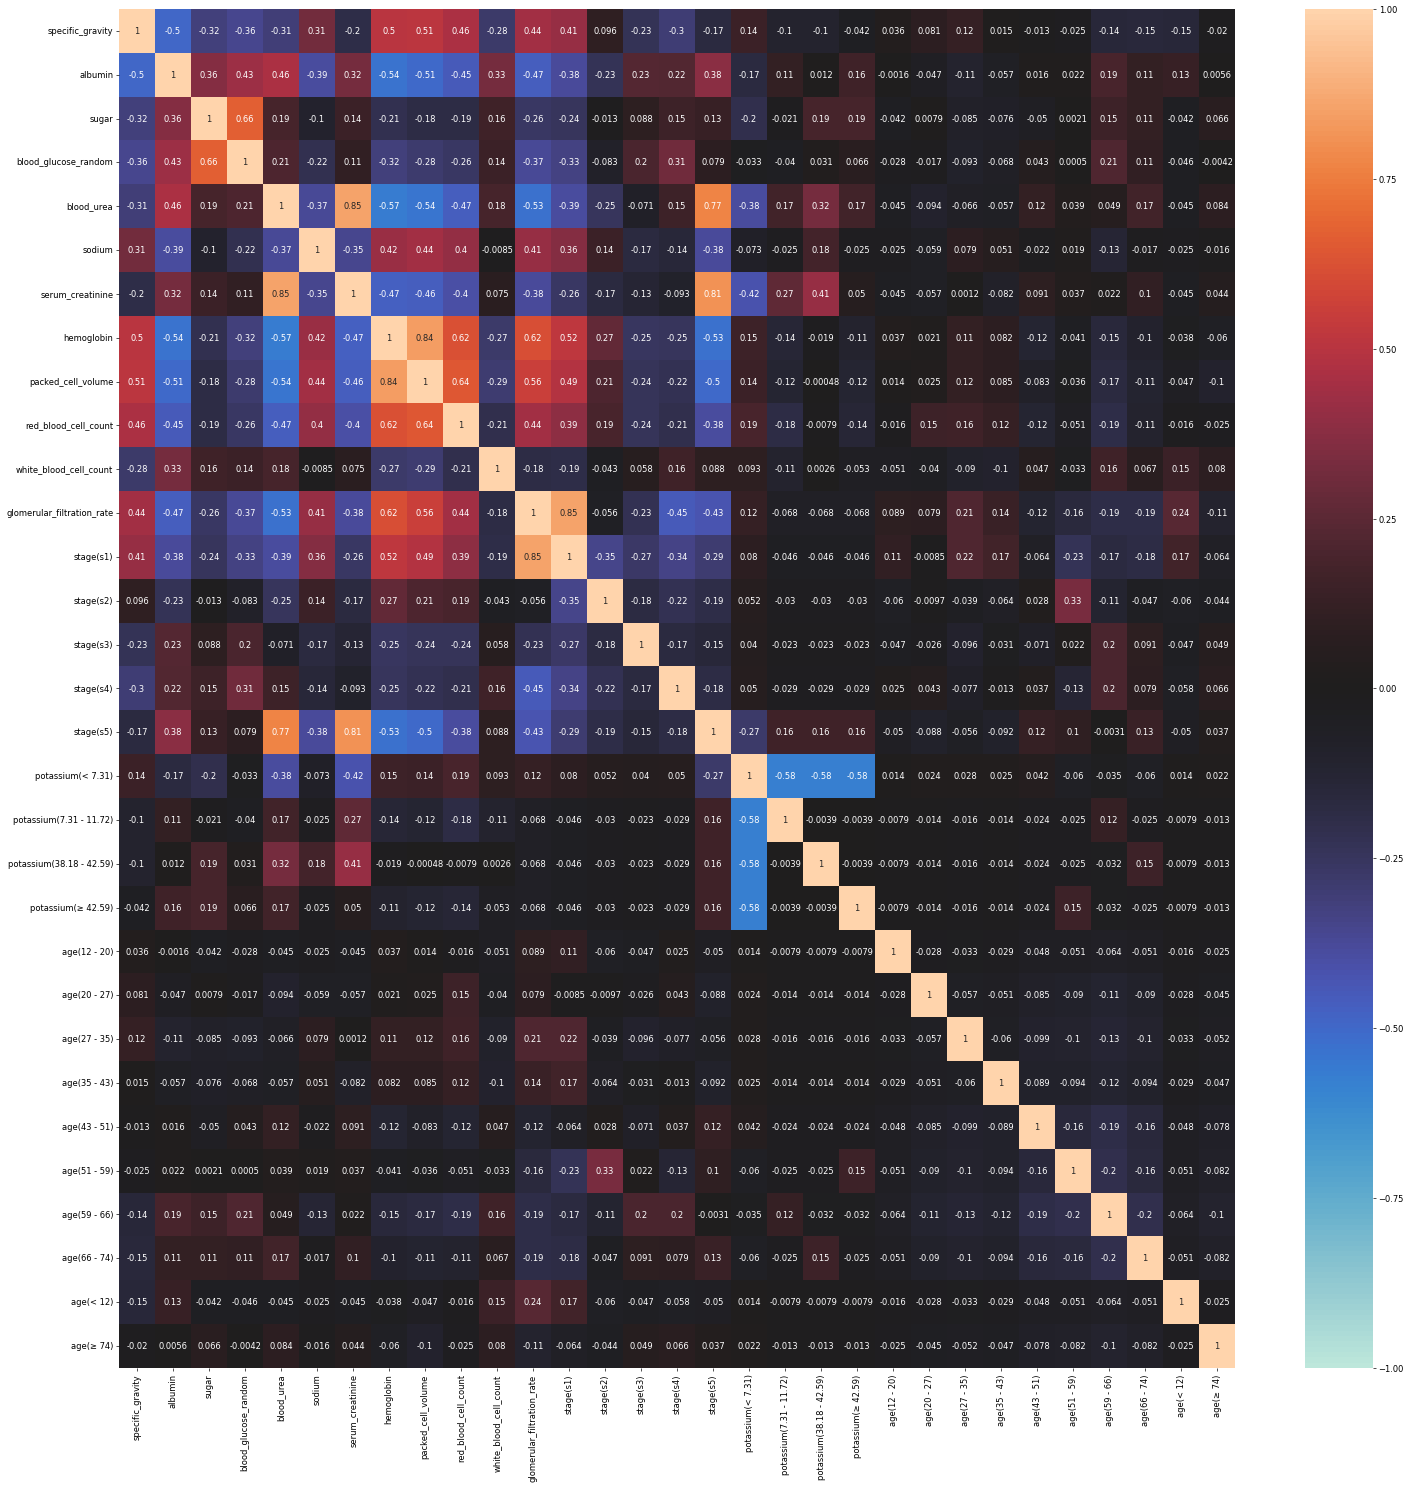

In [97]:
# Using the oversampled data
# correlations
plt.figure(figsize=(30,30), dpi=60);

sns.heatmap(X_df_SMOTE.corr(),vmin=-1, vmax=1,annot=True, cmap = 'icefire')

<AxesSubplot:>

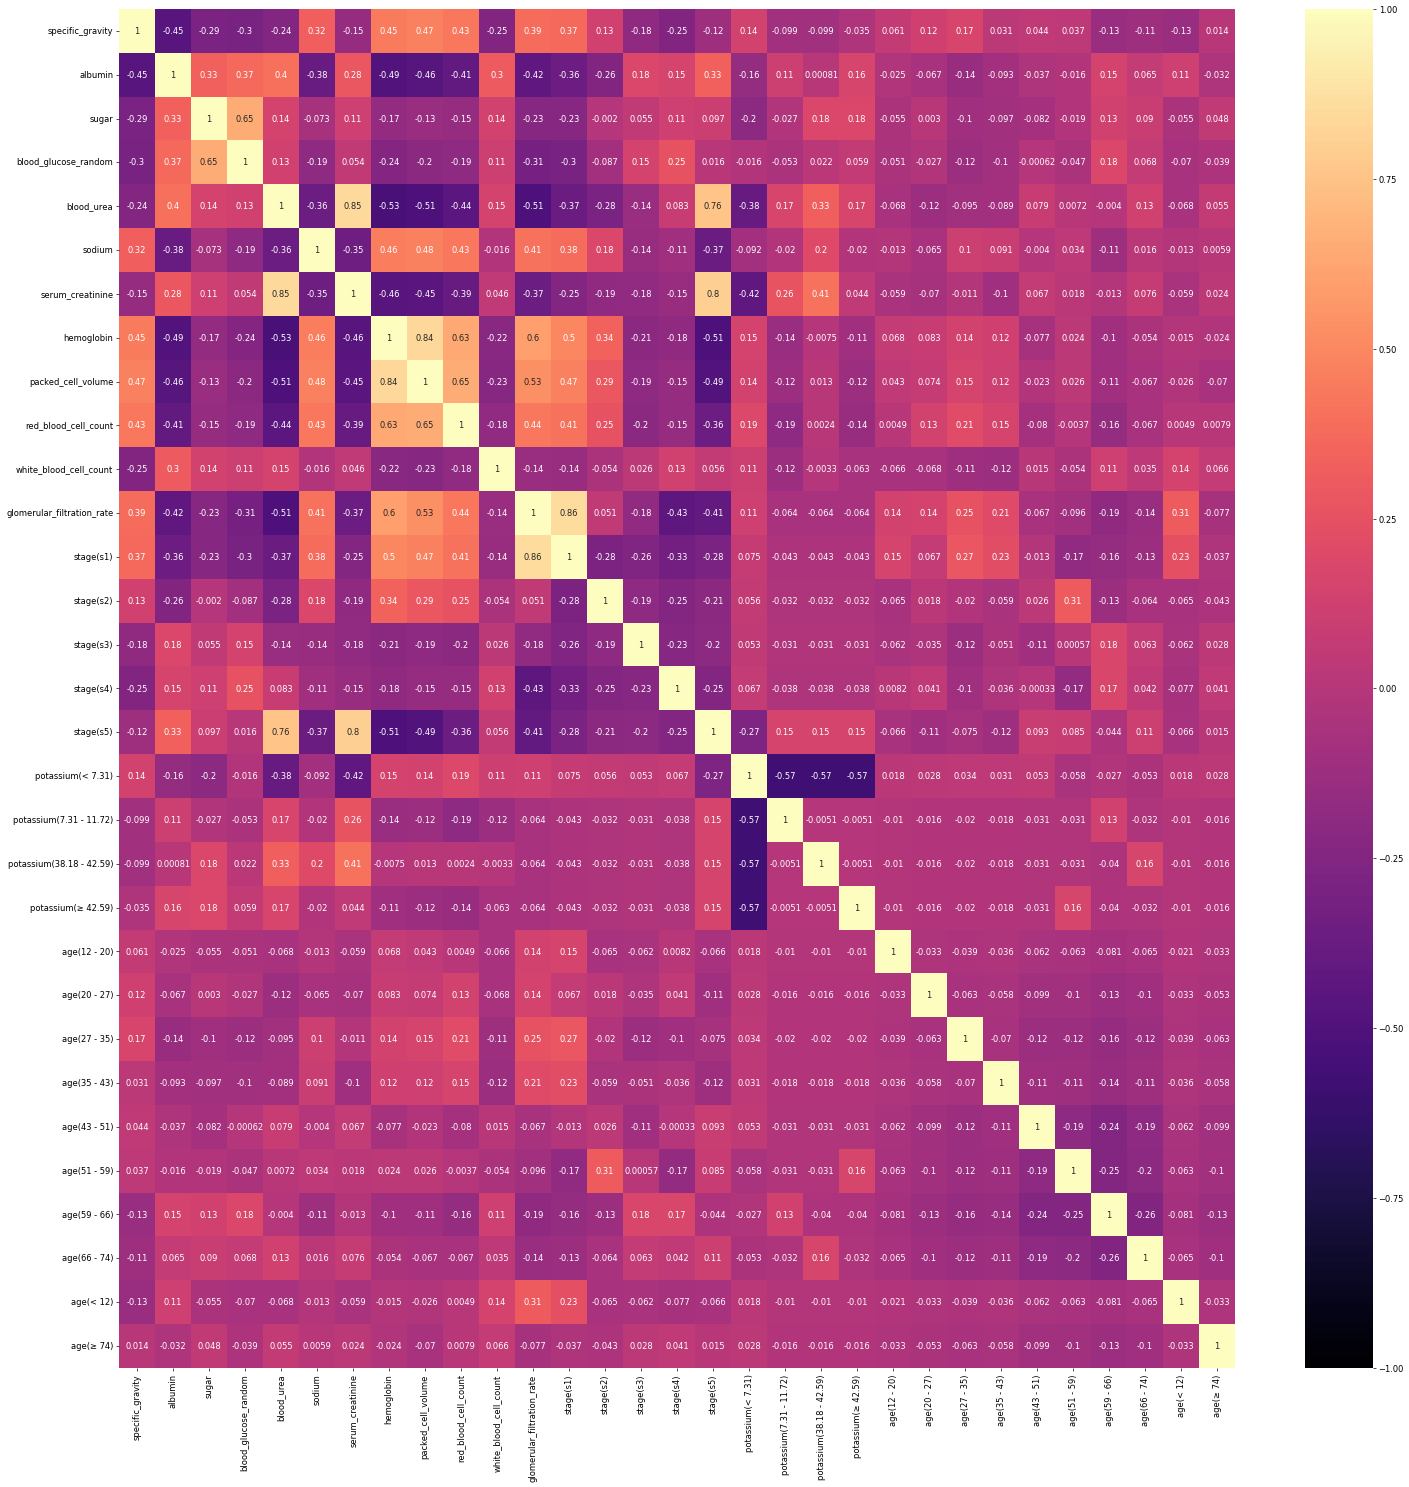

In [98]:
# Using the undersampled data
# correlations
plt.figure(figsize=(30,30), dpi=60);

sns.heatmap(X_df_TK.corr(),vmin=-1, vmax=1,annot=True, cmap = 'magma')

#### High correlations feature selection



##### Oversampled data

Stage 5 CKD with blood urea at 0.76 and serum creatinine at 0.8

Serum creatanine and blood urea at 0.85

Stage 1 CKD with glomerular filtration rate at 0.86

Packed cell volume with hemoglobin at 0.84




##### Undersampled data

Stage 5 CKD with blood urea at 0.77 and serum creatinine at 0.81

Serum creatanine and blood urea at 0.85

Stage 1 CKD with glomerular filtration rate at 0.85

Packed cell volume with hemoglobin at 0.84


In [99]:
# copy data
# dropping blood pressure variables
X_df_SMOTE = X_df_SMOTE.drop(['blood_pressure'], axis=1)
X_df_SMOTE = X_df_SMOTE.drop(['blood_pressure_limit'], axis=1)
X_df_SMOTEa = X_df_SMOTE.copy()

In [100]:
# dropping high correlation features in over sampled data

# blood urea and serum creatinine have high correlation value of 0.9
X_df_SMOTEa = X_df_SMOTEa.drop(['blood_urea'], axis=1)

# hemoglobin has high correlation values with packed cell volume at 0.86
X_df_SMOTEa = X_df_SMOTEa.drop(['packed_cell_volume'], axis=1)


In [101]:
# dropping blood pressure variables
X_df_TK = X_df_TK.drop(['blood_pressure'], axis=1)
X_df_TK = X_df_TK.drop(['blood_pressure_limit'], axis=1)

# copy data
X_df_TKa = X_df_TK.copy()

In [102]:
# dropping high correlation features in under sampled data

# blood urea and serum creatinine have high correlation value of 0.9
X_df_TKa = X_df_TKa.drop(['serum_creatinine'], axis=1)

# hemoglobin has high correlation values with packed cell volume at 0.86
X_df_TKa = X_df_TKa.drop(['hemoglobin'], axis=1)

In [91]:
#kidney_df2a = X_df_TKa.copy()
#kidney_df2a['class'] = y_df_TK

#### Backward elimination feature selection

In [103]:
# copy data that would be used in another feature selection technique
X_df_SMOTEb = X_df_SMOTE.copy()
X_df_TKb = X_df_TK.copy()

Conversion from object to numerical

In [104]:
def extract_obj_cols(kidney):
    object_col = [col for col in kidney.columns if kidney[col].dtype == 'object']
    return object_col

object_columns = extract_obj_cols(X_df_SMOTEb)

In [105]:
def convert_dtype(kidney,feature):
    kidney[feature]=pd.to_numeric(kidney[feature],errors='coerce') 

for i in object_columns:
    convert_dtype(X_df_SMOTEb,i)

In [106]:
X_df_SMOTEb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   specific_gravity            256 non-null    int64  
 1   albumin                     256 non-null    int64  
 2   red_blood_cells             256 non-null    float64
 3   sugar                       256 non-null    int64  
 4   pus_cell                    256 non-null    float64
 5   pus_cell_clumps             256 non-null    float64
 6   bacteria                    256 non-null    float64
 7   blood_glucose_random        256 non-null    int64  
 8   blood_urea                  256 non-null    int64  
 9   sodium                      256 non-null    int64  
 10  serum_creatinine            256 non-null    int64  
 11  hemoglobin                  256 non-null    int64  
 12  packed_cell_volume          256 non-null    int64  
 13  red_blood_cell_count        256 non

In [111]:
## backward elimination
# backward regression
# run everytime before implementation
Selected_Features = []

def backward_regression(X, y, initial_list=[], threshold_out=0.95, verbose=True):
    """To select feature with Backward Stepwise Regression 

    Args:
        X -- features values
        y -- target variable
        initial_list -- features header
        threshold_out -- pvalue threshold of features to drop
        verbose -- true to produce lots of logging output

    Returns:
        list of selected features for modeling 
    """
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y.astype(float), sm.add_constant(pd.DataFrame(X[included].astype(float)))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"worst_feature : {worst_feature}, {worst_pval} ")
        if not changed:
            break
    Selected_Features.append(included)
    print(f"\nSelected Features:\n{Selected_Features[0]}")

In [108]:
backward_regression(X_df_SMOTEb, y_df_SMOTE)

worst_feature : pus_cell_clumps, 1.0 
worst_feature : stage(s1), 0.9848871829881112 
worst_feature : appetite, 1.0 
worst_feature : bacteria, 1.0 
worst_feature : stage(s2), 1.0 
worst_feature : anemia, 1.0 
worst_feature : age(27 - 35), 1.0 
worst_feature : serum_creatinine, 0.9761816650195897 
worst_feature : potassium(≥ 42.59), 0.9836116203608503 
worst_feature : pedal_edema, 0.9622305207906012 
worst_feature : potassium(7.31 - 11.72), 0.9867736350023648 

Selected Features:
['specific_gravity', 'albumin', 'red_blood_cells', 'sugar', 'pus_cell', 'blood_glucose_random', 'blood_urea', 'sodium', 'hemoglobin', 'packed_cell_volume', 'red_blood_cell_count', 'white_blood_cell_count', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'glomerular_filtration_rate', 'affected', 'stage(s3)', 'stage(s4)', 'stage(s5)', 'potassium(< 7.31)', 'potassium(38.18 - 42.59)', 'age(12 - 20)', 'age(20 - 27)', 'age(35 - 43)', 'age(43 - 51)', 'age(51 - 59)', 'age(59 - 66)', 'age(66 - 74)', 'age(

In [109]:
# Keep the selected features only
X_df_SMOTEb = X_df_SMOTEb.loc[:, Selected_Features[0]]

#kidney_df1b = X_df_SMOTEb.copy()
#kidney_df1b['class'] = y_df_SMOTE

In [110]:
X_df_SMOTEb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   specific_gravity            256 non-null    int64  
 1   albumin                     256 non-null    int64  
 2   red_blood_cells             256 non-null    float64
 3   sugar                       256 non-null    int64  
 4   pus_cell                    256 non-null    float64
 5   blood_glucose_random        256 non-null    int64  
 6   blood_urea                  256 non-null    int64  
 7   sodium                      256 non-null    int64  
 8   hemoglobin                  256 non-null    int64  
 9   packed_cell_volume          256 non-null    int64  
 10  red_blood_cell_count        256 non-null    int64  
 11  white_blood_cell_count      256 non-null    int64  
 12  hypertension                256 non-null    float64
 13  diabetes_mellitus           256 non

In [112]:
backward_regression(X_df_TKb, y_df_TK)

worst_feature : anemia, 0.9905158784132362 
worst_feature : stage(s5), 0.985747067793952 
worst_feature : white_blood_cell_count, 1.0 
worst_feature : age(59 - 66), 0.9971805453763756 
worst_feature : potassium(38.18 - 42.59), 0.9980321353782762 
worst_feature : potassium(≥ 42.59), 0.9928664202780926 
worst_feature : potassium(< 7.31), 0.9948862516208002 
worst_feature : age(66 - 74), 0.9904113426307569 
worst_feature : age(≥ 74), 0.9983385396415202 
worst_feature : appetite, 1.0 
worst_feature : glomerular_filtration_rate, 0.9983626758630723 
worst_feature : age(20 - 27), 0.9507946504510988 
worst_feature : hemoglobin, 0.9667205151414622 
worst_feature : coronary_artery_disease, 0.9770536053946448 
worst_feature : age(12 - 20), 0.9755547521014484 
worst_feature : stage(s3), 0.9885145949552925 
worst_feature : age(27 - 35), 1.0 
worst_feature : pus_cell, 1.0 
worst_feature : age(< 12), 0.990772398829327 

Selected Features:
['specific_gravity', 'albumin', 'red_blood_cells', 'sugar', 'p

In [113]:
# Keep the selected features only
X_df_TKb = X_df_TKb.loc[:, Selected_Features[0]]

#kidney_df1b = X_df_TKb.copy()
#kidney_df1b['class'] = y_df_TK

In [114]:
X_df_TKb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   specific_gravity         199 non-null    int64 
 1   albumin                  199 non-null    int64 
 2   red_blood_cells          199 non-null    object
 3   sugar                    199 non-null    int64 
 4   pus_cell_clumps          199 non-null    object
 5   bacteria                 199 non-null    object
 6   blood_glucose_random     199 non-null    int64 
 7   blood_urea               199 non-null    int64 
 8   sodium                   199 non-null    int64 
 9   serum_creatinine         199 non-null    int64 
 10  packed_cell_volume       199 non-null    int64 
 11  red_blood_cell_count     199 non-null    int64 
 12  hypertension             199 non-null    object
 13  diabetes_mellitus        199 non-null    object
 14  pedal_edema              199 non-null    o

# MACHINE LEARNING IMPLEMENTATION

Splitting the data into train, test and validation sets

In [115]:
# data split where all missing values are removed
kidney_X0 = kidney_df3.drop(['class'], axis=1)
kidney_y0 = kidney_df3['class']

train_X0, test_X0, train_Y0, test_Y0 = train_test_split(kidney_X0, kidney_y0, test_size=0.3, random_state=1234)
#test_X1, validation_X1, test_Y1, validation_Y1 = train_test_split(val_X1, val_Y1, test_size=0.5, random_state=1234)


print("\nMagnitude of the descriptive training features:", train_X0.shape)
print("Magnitude of the target training features:", train_Y0.shape)
#print("\nMagnitude of the descriptive validation features:", validation_X1.shape)
#print("Magnitude of the target validation features:", validation_Y1.shape)
print("\nMagnitude of the descriptive test features:", test_X0.shape)
print("Magnitude of the target test features:", test_Y0.shape)


Magnitude of the descriptive training features: (140, 44)
Magnitude of the target training features: (140,)

Magnitude of the descriptive test features: (60, 44)
Magnitude of the target test features: (60,)


In [116]:
train_X0a, test_X0a, train_Y0a, test_Y0a = train_test_split(X_df_SMOTE, y_df_SMOTE, test_size=0.3, random_state=1234)
#test_X1, validation_X1, test_Y1, validation_Y1 = train_test_split(val_X1, val_Y1, test_size=0.5, random_state=1234)


print("\nMagnitude of the descriptive training features:", train_X0a.shape)
print("Magnitude of the target training features:", train_Y0a.shape)
#print("\nMagnitude of the descriptive validation features:", validation_X1.shape)
#print("Magnitude of the target validation features:", validation_Y1.shape)
print("\nMagnitude of the descriptive test features:", test_X0a.shape)
print("Magnitude of the target test features:", test_Y0a.shape)


Magnitude of the descriptive training features: (179, 42)
Magnitude of the target training features: (179,)

Magnitude of the descriptive test features: (77, 42)
Magnitude of the target test features: (77,)


In [117]:
train_X0b, test_X0b, train_Y0b, test_Y0b = train_test_split(X_df_TK, y_df_TK, test_size=0.3, random_state=1234)
#test_X1, validation_X1, test_Y1, validation_Y1 = train_test_split(val_X1, val_Y1, test_size=0.5, random_state=1234)


print("\nMagnitude of the descriptive training features:", train_X0b.shape)
print("Magnitude of the target training features:", train_Y0b.shape)
#print("\nMagnitude of the descriptive validation features:", validation_X1.shape)
#print("Magnitude of the target validation features:", validation_Y1.shape)
print("\nMagnitude of the descriptive test features:", test_X0b.shape)
print("Magnitude of the target test features:", test_Y0b.shape)


Magnitude of the descriptive training features: (139, 42)
Magnitude of the target training features: (139,)

Magnitude of the descriptive test features: (60, 42)
Magnitude of the target test features: (60,)


In [118]:
train_X1, test_X1, train_Y1, test_Y1 = train_test_split(X_df_SMOTEa, y_df_SMOTE, test_size=0.3, random_state=1234)


print("\nMagnitude of the descriptive training features:", train_X1.shape)
print("Magnitude of the target training features:", train_Y1.shape)
#print("\nMagnitude of the descriptive validation features:", validation_X1.shape)
#print("Magnitude of the target validation features:", validation_Y1.shape)
print("\nMagnitude of the descriptive test features:", test_X1.shape)
print("Magnitude of the target test features:", test_Y1.shape)


Magnitude of the descriptive training features: (179, 40)
Magnitude of the target training features: (179,)

Magnitude of the descriptive test features: (77, 40)
Magnitude of the target test features: (77,)


In [119]:
train_X2, test_X2, train_Y2, test_Y2 = train_test_split(X_df_SMOTEb, y_df_SMOTE, test_size=0.3, random_state=1234)
#test_X2, validation_X2, test_Y2, validation_Y2 = train_test_split(val_X2, val_Y2, test_size=0.5, random_state=1234)


print("\nMagnitude of the descriptive training features:", train_X2.shape)
print("Magnitude of the target training features:", train_Y2.shape)
#print("\nMagnitude of the descriptive validation features:", validation_X2.shape)
#print("Magnitude of the target validation features:", validation_Y2.shape)
print("\nMagnitude of the descriptive test features:", test_X2.shape)
print("Magnitude of the target test features:", test_Y2.shape)


Magnitude of the descriptive training features: (179, 31)
Magnitude of the target training features: (179,)

Magnitude of the descriptive test features: (77, 31)
Magnitude of the target test features: (77,)


In [120]:
train_X3, test_X3, train_Y3, test_Y3 = train_test_split(X_df_TKa, y_df_TK, test_size=0.3, random_state=1234)


print("\nMagnitude of the descriptive training features:", train_X3.shape)
print("Magnitude of the target training features:", train_Y3.shape)
#print("\nMagnitude of the descriptive validation features:", validation_X1.shape)
#print("Magnitude of the target validation features:", validation_Y1.shape)
print("\nMagnitude of the descriptive test features:", test_X3.shape)
print("Magnitude of the target test features:", test_Y3.shape)


Magnitude of the descriptive training features: (139, 40)
Magnitude of the target training features: (139,)

Magnitude of the descriptive test features: (60, 40)
Magnitude of the target test features: (60,)


In [121]:
train_X4, test_X4, train_Y4, test_Y4 = train_test_split(X_df_TKb, y_df_TK, test_size=0.3, random_state=1234)


print("\nMagnitude of the descriptive training features:", train_X4.shape)
print("Magnitude of the target training features:", train_Y4.shape)
#print("\nMagnitude of the descriptive validation features:", validation_X1.shape)
#print("Magnitude of the target validation features:", validation_Y1.shape)
print("\nMagnitude of the descriptive test features:", test_X4.shape)
print("Magnitude of the target test features:", test_Y4.shape)


Magnitude of the descriptive training features: (139, 23)
Magnitude of the target training features: (139,)

Magnitude of the descriptive test features: (60, 23)
Magnitude of the target test features: (60,)


## Machine Learning Algorithm: Decision Tree

In [122]:
baseline_classification_tree = DecisionTreeClassifier(random_state=42)

In [123]:
# Implementation on simple unsampled data

# Fitting the decision tree
baseline_classification_tree.fit(train_X0, train_Y0)

# Performance of the tree on the train data
train_tree_prediction0 = baseline_classification_tree.predict(train_X0)

print("Decision tree performance on training data")

print('Confusion Matrix:')
print(confusion_matrix(train_Y0, train_tree_prediction0))

print('\nClassification Report:')
print(classification_report(train_Y0, train_tree_prediction0))

print('Accuracy Score on train data:')
baseline_classification_tree.score(train_X0, train_Y0)

# Performance of the tree on the test data
test_tree_prediction0 = baseline_classification_tree.predict(test_X0)

print("\n\nDecision tree performance on test data")

print('Confusion Matrix:')
print(confusion_matrix(test_Y0, test_tree_prediction0))

print('\nClassification Report:')
print(classification_report(test_Y0, test_tree_prediction0))

print('Accuracy Score on test data:')
baseline_classification_tree.score(test_X0, test_Y0)

Decision tree performance on training data
Confusion Matrix:
[[54  0]
 [ 0 86]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        86

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

Accuracy Score on train data:


Decision tree performance on test data
Confusion Matrix:
[[18  0]
 [ 0 42]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        42

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Accuracy Score on test data:


1.0

In [125]:
# Implementation on simple under sampled data

# Fitting the decision tree
baseline_classification_tree.fit(train_X0a, train_Y0a)

# Performance of the tree on the train data
train_tree_prediction0a = baseline_classification_tree.predict(train_X0a)

print("Decision tree performance on training data")

print('Confusion Matrix:')
print(confusion_matrix(train_Y0a, train_tree_prediction0a))

print('\nClassification Report:')
print(classification_report(train_Y0a, train_tree_prediction0a))

print('Accuracy Score on train data:')
baseline_classification_tree.score(train_X0a, train_Y0a)

# Performance of the tree on the test data
test_tree_prediction0a = baseline_classification_tree.predict(test_X0a)

print("\n\nDecision tree performance on test data")

print('Confusion Matrix:')
print(confusion_matrix(test_Y0a, test_tree_prediction0a))

print('\nClassification Report:')
print(classification_report(test_Y0a, test_tree_prediction0a))

print('Accuracy Score on test data:')
baseline_classification_tree.score(test_X0a, test_Y0a)

Decision tree performance on training data
Confusion Matrix:
[[99  0]
 [ 0 80]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00        80

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179

Accuracy Score on train data:


Decision tree performance on test data
Confusion Matrix:
[[29  0]
 [ 0 48]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        48

    accuracy                           1.00        77
   macro avg       1.00      1.00      1.00        77
weighted avg       1.00      1.00      1.00        77

Accuracy Score on test data:


1.0

In [126]:
# Implementation on simple unsampled data

# Fitting the decision tree
baseline_classification_tree.fit(train_X0, train_Y0)

# Performance of the tree on the train data
train_tree_prediction0 = baseline_classification_tree.predict(train_X0)

print("Decision tree performance on training data")

print('Confusion Matrix:')
print(confusion_matrix(train_Y0, train_tree_prediction0))

print('\nClassification Report:')
print(classification_report(train_Y0, train_tree_prediction0))

print('Accuracy Score on train data:')
baseline_classification_tree.score(train_X0, train_Y0)

# Performance of the tree on the test data
test_tree_prediction0 = baseline_classification_tree.predict(test_X0)

print("\n\nDecision tree performance on test data")

print('Confusion Matrix:')
print(confusion_matrix(test_Y0, test_tree_prediction0))

print('\nClassification Report:')
print(classification_report(test_Y0, test_tree_prediction0))

print('Accuracy Score on test data:')
baseline_classification_tree.score(test_X0, test_Y0)

Decision tree performance on training data
Confusion Matrix:
[[54  0]
 [ 0 86]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        86

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

Accuracy Score on train data:


Decision tree performance on test data
Confusion Matrix:
[[18  0]
 [ 0 42]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        42

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Accuracy Score on test data:


1.0

In [127]:
# Implementation on oversampled data

# Fitting the decision tree
baseline_classification_tree.fit(train_X1, train_Y1)

# Performance of the tree on the train data
train_tree_prediction1 = baseline_classification_tree.predict(train_X1)

print("Decision tree performance on training data")

print('Confusion Matrix:')
print(confusion_matrix(train_Y1, train_tree_prediction1))

print('\nClassification Report:')
print(classification_report(train_Y1, train_tree_prediction1))

print('Accuracy Score on train data:')
baseline_classification_tree.score(train_X1, train_Y1)

# Performance of the tree on the test data
test_tree_prediction1 = baseline_classification_tree.predict(test_X1)

print("\n\nDecision tree performance on test data")

print('Confusion Matrix:')
print(confusion_matrix(test_Y1, test_tree_prediction1))

print('\nClassification Report:')
print(classification_report(test_Y1, test_tree_prediction1))

print('Accuracy Score on test data:')
baseline_classification_tree.score(test_X1, test_Y1)

Decision tree performance on training data
Confusion Matrix:
[[99  0]
 [ 0 80]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00        80

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179

Accuracy Score on train data:


Decision tree performance on test data
Confusion Matrix:
[[29  0]
 [ 0 48]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        48

    accuracy                           1.00        77
   macro avg       1.00      1.00      1.00        77
weighted avg       1.00      1.00      1.00        77

Accuracy Score on test data:


1.0

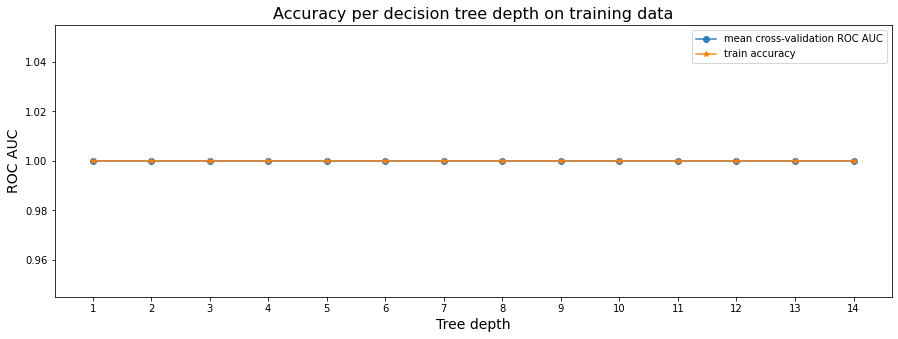

In [363]:
# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=10, scoring='roc_auc'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(criterion='gini', max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation ROC AUC', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('ROC AUC', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 15
sm_tree_depths = range(1,15)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(train_X1, train_Y1, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

In [364]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The depth-1 tree achieves the best mean cross-validation accuracy 100.0 +/- 0.0% on training dataset


In [ ]:
# Implementation on undersampled data

In [128]:
# Fitting the decision tree
baseline_classification_tree.fit(train_X2, train_Y2)

# Performance of the tree on the train data
train_tree_prediction2 = baseline_classification_tree.predict(train_X2)

print("Decision tree performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y2, train_tree_prediction2))

print('\nClassification Report:')
print(classification_report(train_Y2, train_tree_prediction2))

print('Accuracy Score on train data: {}'.format(baseline_classification_tree.score(train_X2, train_Y2)))


# Performance of the tree on the test data
test_tree_prediction2 = baseline_classification_tree.predict(test_X2)

print("\n\nDecision tree performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y2, test_tree_prediction2))

print('\nClassification Report:')
print(classification_report(test_Y2, test_tree_prediction2))

print('Accuracy Score on test data: {}'. format(baseline_classification_tree.score(test_X2, test_Y2)))


Decision tree performance on training data

Confusion Matrix:
[[99  0]
 [ 0 80]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00        80

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179

Accuracy Score on train data: 1.0


Decision tree performance on test data

Confusion Matrix:
[[29  0]
 [ 0 48]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        48

    accuracy                           1.00        77
   macro avg       1.00      1.00      1.00        77
weighted avg       1.00      1.00      1.00        77

Accuracy Score on test data: 1.0


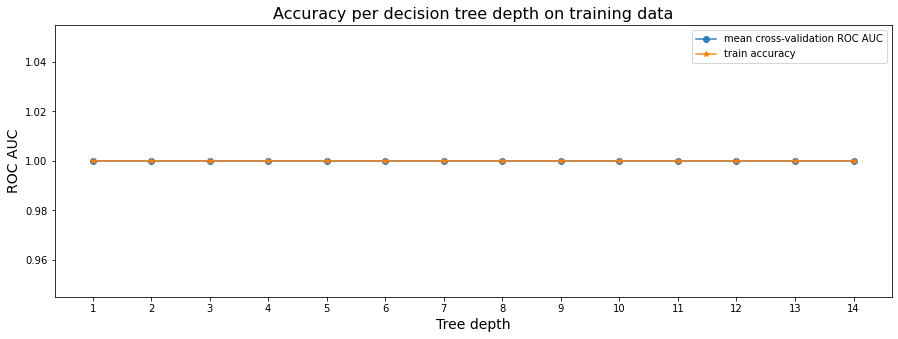

In [365]:
# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=10, scoring='roc_auc'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(criterion='gini', max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation ROC AUC', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('ROC AUC', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 15
sm_tree_depths = range(1,15)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(train_X2, train_Y2, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

In [366]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The depth-1 tree achieves the best mean cross-validation accuracy 100.0 +/- 0.0% on training dataset


In [130]:
# Fitting the decision tree
baseline_classification_tree.fit(train_X3, train_Y3)

# Performance of the tree on the train data
train_tree_prediction3 = baseline_classification_tree.predict(train_X3)

print("Decision tree performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y3, train_tree_prediction3))

print('\nClassification Report:')
print(classification_report(train_Y3, train_tree_prediction3))

print('Accuracy Score on train data: {}'.format(baseline_classification_tree.score(train_X3, train_Y3)))


# Performance of the tree on the test data
test_tree_prediction3 = baseline_classification_tree.predict(test_X3)

print("\n\nDecision tree performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y3, test_tree_prediction3))

print('\nClassification Report:')
print(classification_report(test_Y3, test_tree_prediction3))

print('Accuracy Score on test data: {}'. format(baseline_classification_tree.score(test_X3, test_Y3)))


Decision tree performance on training data

Confusion Matrix:
[[49  0]
 [ 0 90]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        90

    accuracy                           1.00       139
   macro avg       1.00      1.00      1.00       139
weighted avg       1.00      1.00      1.00       139

Accuracy Score on train data: 1.0


Decision tree performance on test data

Confusion Matrix:
[[23  0]
 [ 0 37]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        37

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Accuracy Score on test data: 1.0


In [129]:
# Fitting the decision tree
baseline_classification_tree.fit(train_X4, train_Y4)

# Performance of the tree on the train data
train_tree_prediction4 = baseline_classification_tree.predict(train_X4)

print("Decision tree performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y4, train_tree_prediction4))

print('\nClassification Report:')
print(classification_report(train_Y4, train_tree_prediction4))

print('Accuracy Score on train data: {}'.format(baseline_classification_tree.score(train_X4, train_Y4)))


# Performance of the tree on the test data
test_tree_prediction4 = baseline_classification_tree.predict(test_X4)

print("\n\nDecision tree performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y4, test_tree_prediction4))

print('\nClassification Report:')
print(classification_report(test_Y4, test_tree_prediction4))

print('Accuracy Score on test data: {}'. format(baseline_classification_tree.score(test_X4, test_Y4)))


Decision tree performance on training data

Confusion Matrix:
[[49  0]
 [ 0 90]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        90

    accuracy                           1.00       139
   macro avg       1.00      1.00      1.00       139
weighted avg       1.00      1.00      1.00       139

Accuracy Score on train data: 1.0


Decision tree performance on test data

Confusion Matrix:
[[23  0]
 [ 0 37]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        37

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Accuracy Score on test data: 1.0


## Machine Learning Algorithm: Random Forest

In [131]:
baseline_random_forest = RandomForestClassifier(n_estimators = 100, bootstrap=True, 
                                       oob_score=True,random_state=1) 

In [132]:
# Implementation on simple unsampled data

# Fitting the decision tree
baseline_random_forest.fit(train_X0, train_Y0)

# Performance of the tree on the train data
train_rf_prediction0 = baseline_random_forest.predict(train_X0)

print("Decision tree performance on training data")

print('Confusion Matrix:')
print(confusion_matrix(train_Y0, train_rf_prediction0))

print('\nClassification Report:')
print(classification_report(train_Y0, train_rf_prediction0))

print('Accuracy Score on train data:')
baseline_random_forest.score(train_X0, train_Y0)

# Performance of the tree on the test data
train_rf_prediction0 = baseline_random_forest.predict(test_X0)

print("\n\nDecision tree performance on test data")

print('Confusion Matrix:')
print(confusion_matrix(test_Y0, train_rf_prediction0))

print('\nClassification Report:')
print(classification_report(test_Y0, train_rf_prediction0))

print('Accuracy Score on test data:')
baseline_random_forest.score(test_X0, test_Y0)

# ROC & AUC
auc0 = np.round(roc_auc_score(test_Y0, train_rf_prediction0), 3)
 
print("AUC for our sample data is {}". format(auc0))

Decision tree performance on training data
Confusion Matrix:
[[54  0]
 [ 0 86]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        86

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

Accuracy Score on train data:


Decision tree performance on test data
Confusion Matrix:
[[18  0]
 [ 0 42]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        42

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Accuracy Score on test data:
AUC for our sample data is 1.0


In [133]:
# Implementation on simple unsampled data

# Fitting the decision tree
baseline_random_forest.fit(train_X0a, train_Y0a)

# Performance of the tree on the train data
train_rf_prediction0a = baseline_random_forest.predict(train_X0a)

print("Decision tree performance on training data")

print('Confusion Matrix:')
print(confusion_matrix(train_Y0a, train_rf_prediction0a))

print('\nClassification Report:')
print(classification_report(train_Y0a, train_rf_prediction0a))

print('Accuracy Score on train data:')
baseline_random_forest.score(train_X0a, train_Y0a)

# Performance of the tree on the test data
train_rf_prediction0a = baseline_random_forest.predict(test_X0a)

print("\n\nDecision tree performance on test data")

print('Confusion Matrix:')
print(confusion_matrix(test_Y0a, train_rf_prediction0a))

print('\nClassification Report:')
print(classification_report(test_Y0a, train_rf_prediction0a))

print('Accuracy Score on test data:')
baseline_random_forest.score(test_X0a, test_Y0a)

# ROC & AUC
auc0a = np.round(roc_auc_score(test_Y0a, train_rf_prediction0a), 3)
 
print("AUC for our sample data is {}". format(auc0a))

Decision tree performance on training data
Confusion Matrix:
[[99  0]
 [ 0 80]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00        80

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179

Accuracy Score on train data:


Decision tree performance on test data
Confusion Matrix:
[[29  0]
 [ 0 48]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        48

    accuracy                           1.00        77
   macro avg       1.00      1.00      1.00        77
weighted avg       1.00      1.00      1.00        77

Accuracy Score on test data:
AUC for our sample data is 1.0


In [134]:
# Implementation on simple unsampled data

# Fitting the decision tree
baseline_random_forest.fit(train_X0b, train_Y0b)

# Performance of the tree on the train data
train_rf_prediction0b = baseline_random_forest.predict(train_X0b)

print("Decision tree performance on training data")

print('Confusion Matrix:')
print(confusion_matrix(train_Y0b, train_rf_prediction0b))

print('\nClassification Report:')
print(classification_report(train_Y0b, train_rf_prediction0b))

print('Accuracy Score on train data:')
baseline_random_forest.score(train_X0b, train_Y0b)

# Performance of the tree on the test data
train_rf_prediction0b = baseline_random_forest.predict(test_X0b)

print("\n\nDecision tree performance on test data")

print('Confusion Matrix:')
print(confusion_matrix(test_Y0b, train_rf_prediction0b))

print('\nClassification Report:')
print(classification_report(test_Y0b, train_rf_prediction0b))

print('Accuracy Score on test data:')
baseline_random_forest.score(test_X0b, test_Y0b)

# ROC & AUC
auc0b = np.round(roc_auc_score(test_Y0b, train_rf_prediction0b), 3)
 
print("AUC for our sample data is {}". format(auc0b))

Decision tree performance on training data
Confusion Matrix:
[[49  0]
 [ 0 90]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        90

    accuracy                           1.00       139
   macro avg       1.00      1.00      1.00       139
weighted avg       1.00      1.00      1.00       139

Accuracy Score on train data:


Decision tree performance on test data
Confusion Matrix:
[[23  0]
 [ 0 37]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        37

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Accuracy Score on test data:
AUC for our sample data is 1.0


In [135]:
# Implementation on oversampled data

# Fitting the random forest
baseline_random_forest.fit(train_X1, train_Y1)

# Performance of the tree on the train data
train_rf_prediction1 = baseline_random_forest.predict(train_X1)

print("Random Forest Classifier  performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y1, train_rf_prediction1))

print('\nClassification Report:')
print(classification_report(train_Y1, train_rf_prediction1))

print('Accuracy Score on train data: {}'.format(baseline_random_forest.score(train_X1, train_Y1)))


# Performance of the tree on the test data
test_rf_prediction1 = baseline_random_forest.predict(test_X1)

print("\n\nRandom Forest Classifier performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y1, test_rf_prediction1))

print('\nClassification Report:')
print(classification_report(test_Y1, test_rf_prediction1))

print('Accuracy Score on test data: {}'. format(baseline_random_forest.score(test_X1, test_Y1)))

Random Forest Classifier  performance on training data

Confusion Matrix:
[[99  0]
 [ 0 80]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00        80

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179

Accuracy Score on train data: 1.0


Random Forest Classifier performance on test data

Confusion Matrix:
[[29  0]
 [ 0 48]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        48

    accuracy                           1.00        77
   macro avg       1.00      1.00      1.00        77
weighted avg       1.00      1.00      1.00        77

Accuracy Score on test data: 1.0


In [136]:
# Implementation on overersampled data

# Fitting the random forest
baseline_random_forest.fit(train_X2, train_Y2)

# Performance of the tree on the train data
train_rf_prediction2 = baseline_random_forest.predict(train_X2)

print("Random Forest Classifier  performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y2, train_rf_prediction2))

print('\nClassification Report:')
print(classification_report(train_Y2, train_rf_prediction2))

print('Accuracy Score on train data: {}'.format(baseline_random_forest.score(train_X2, train_Y2)))
print('Out of bag (OOB) score {}'.format(baseline_random_forest.oob_score_))


# Performance of the tree on the test data
test_rf_prediction2 = baseline_random_forest.predict(test_X2)

print("\n\nRandom Forest Classifier performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y2, test_rf_prediction2))

print('\nClassification Report:')
print(classification_report(test_Y2, test_rf_prediction2))

print('Accuracy Score on test data: {}'. format(baseline_random_forest.score(test_X2, test_Y2)))

Random Forest Classifier  performance on training data

Confusion Matrix:
[[99  0]
 [ 0 80]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00        80

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179

Accuracy Score on train data: 1.0
Out of bag (OOB) score 1.0


Random Forest Classifier performance on test data

Confusion Matrix:
[[29  0]
 [ 0 48]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        48

    accuracy                           1.00        77
   macro avg       1.00      1.00      1.00        77
weighted avg       1.00      1.00      1.00        77

Accuracy Score on test data: 1.0


In [137]:
# Implementation on overersampled data

# Fitting the random forest
baseline_random_forest.fit(train_X3, train_Y3)

# Performance of the tree on the train data
train_rf_prediction3 = baseline_random_forest.predict(train_X3)

print("Random Forest Classifier  performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y3, train_rf_prediction3))

print('\nClassification Report:')
print(classification_report(train_Y3, train_rf_prediction3))

print('Accuracy Score on train data: {}'.format(baseline_random_forest.score(train_X3, train_Y3)))
print('Out of bag (OOB) score {}'.format(baseline_random_forest.oob_score_))


# Performance of the tree on the test data
test_rf_prediction3 = baseline_random_forest.predict(test_X3)

print("\n\nRandom Forest Classifier performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y3, test_rf_prediction3))

print('\nClassification Report:')
print(classification_report(test_Y3, test_rf_prediction3))

print('Accuracy Score on test data: {}'. format(baseline_random_forest.score(test_X3, test_Y3)))

Random Forest Classifier  performance on training data

Confusion Matrix:
[[49  0]
 [ 0 90]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        90

    accuracy                           1.00       139
   macro avg       1.00      1.00      1.00       139
weighted avg       1.00      1.00      1.00       139

Accuracy Score on train data: 1.0
Out of bag (OOB) score 1.0


Random Forest Classifier performance on test data

Confusion Matrix:
[[23  0]
 [ 0 37]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        37

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Accuracy Score on test data: 1.0


In [138]:
# Implementation on undersampled data

# Fitting the random forest
baseline_random_forest.fit(train_X4, train_Y4)

# Performance of the tree on the train data
train_rf_prediction4 = baseline_random_forest.predict(train_X4)

print("Random Forest Classifier  performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y4, train_rf_prediction4))

print('\nClassification Report:')
print(classification_report(train_Y4, train_rf_prediction4))

print('Accuracy Score on train data: {}'.format(baseline_random_forest.score(train_X4, train_Y4)))
print('Out of bag (OOB) score {}'.format(baseline_random_forest.oob_score_))


# Performance of the tree on the test data
test_rf_prediction4 = baseline_random_forest.predict(test_X4)

print("\n\nRandom Forest Classifier performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y4, test_rf_prediction4))

print('\nClassification Report:')
print(classification_report(test_Y4, test_rf_prediction4))

print('Accuracy Score on test data: {}'. format(baseline_random_forest.score(test_X4, test_Y4)))

Random Forest Classifier  performance on training data

Confusion Matrix:
[[49  0]
 [ 0 90]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        90

    accuracy                           1.00       139
   macro avg       1.00      1.00      1.00       139
weighted avg       1.00      1.00      1.00       139

Accuracy Score on train data: 1.0
Out of bag (OOB) score 1.0


Random Forest Classifier performance on test data

Confusion Matrix:
[[23  0]
 [ 0 37]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        37

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Accuracy Score on test data: 1.0


## Machine Learning Algorithm: K-nearest neighbour

In [139]:
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_k0 = train_X0.values
x_test_k0 = test_X0.values
#x_validation_k1 = validation_X1.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_knorm0 = min_max_scaler.fit_transform(x_train_k0)
x_test_knorm0 = min_max_scaler.fit_transform(x_test_k0)
#x_validation_knorm1 = min_max_scaler.fit_transform(x_validation_k1)


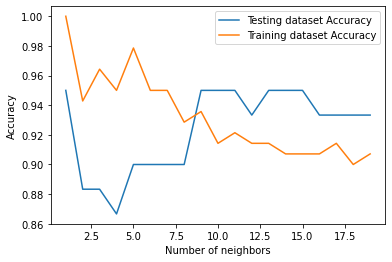

In [140]:
neighbors = np.arange(1, 20)
knn_train_accuracy = np.empty(len(neighbors))
knn_test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_knorm0, train_Y0)
     
    # Compute training and test data accuracy
    knn_train_accuracy[i] = knn.score(x_train_knorm0, train_Y0)
    knn_test_accuracy[i] = knn.score(x_test_knorm0, test_Y0)
 
# Generate plot
plt.plot(neighbors, knn_test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, knn_train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [141]:

knn_10 = KNeighborsClassifier(n_neighbors=10)

knn_10.fit(x_train_knorm0, train_Y0)

# Predict on dataset which model has not seen before
knn_predict_train_0 = knn_10.predict(x_train_knorm0)

print('Confusion Matrix for Train data:')
print(confusion_matrix(train_Y0, knn_predict_train_0))
print('\nClassification Report')
print(classification_report(train_Y0, knn_predict_train_0))
print("\nAccuracy Score on train set:")
print(knn_10.score(x_train_knorm0, train_Y0))
 
# Predict on dataset which model has not seen before
knn_predict_test0 = knn_10.predict(x_test_knorm0)

print('Confusion Matrix for Test data:')
print(confusion_matrix(test_Y0, knn_predict_test0))
print('\nClassification Report')
print(classification_report(test_Y0, knn_predict_test0))
print("\nAccuracy Score on test set:")
print(knn_10.score(x_test_knorm0, test_Y0))

# ROC & AUC
auc0 = np.round(roc_auc_score(test_Y0, knn_predict_test0), 3)
 
print("AUC for our sample data is {}". format(auc0))

Confusion Matrix for Train data:
[[54  0]
 [12 74]]

Classification Report
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        54
           1       1.00      0.86      0.92        86

    accuracy                           0.91       140
   macro avg       0.91      0.93      0.91       140
weighted avg       0.93      0.91      0.92       140


Accuracy Score on train set:
0.9142857142857143
Confusion Matrix for Test data:
[[18  0]
 [ 3 39]]

Classification Report
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        18
           1       1.00      0.93      0.96        42

    accuracy                           0.95        60
   macro avg       0.93      0.96      0.94        60
weighted avg       0.96      0.95      0.95        60


Accuracy Score on test set:
0.95
AUC for our sample data is 0.964


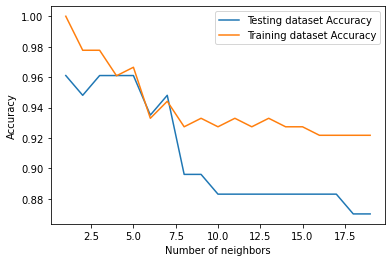

In [143]:
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_k0a = train_X0a.values
x_test_k0a = test_X0a.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_knorm0a = min_max_scaler.fit_transform(x_train_k0a)
x_test_knorm0a = min_max_scaler.fit_transform(x_test_k0a)


neighbors = np.arange(1, 20)
knn_train_accuracy = np.empty(len(neighbors))
knn_test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_knorm0a, train_Y0a)
     
    # Compute training and test data accuracy
    knn_train_accuracy[i] = knn.score(x_train_knorm0a, train_Y0a)
    knn_test_accuracy[i] = knn.score(x_test_knorm0a, test_Y0a)
 
# Generate plot
plt.plot(neighbors, knn_test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, knn_train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [145]:

knn_5 = KNeighborsClassifier(n_neighbors=5)

knn_5.fit(x_train_knorm0a, train_Y0a)

# Predict on dataset which model has not seen before
knn_predict_train_0a = knn_5.predict(x_train_knorm0a)

print('Confusion Matrix for Train data:')
print(confusion_matrix(train_Y0a, knn_predict_train_0a))
print('\nClassification Report')
print(classification_report(train_Y0a, knn_predict_train_0a))
print("\nAccuracy Score on train set:")
print(knn_5.score(x_train_knorm0a, train_Y0a))
 
# Predict on dataset which model has not seen before
knn_predict_test0a = knn_5.predict(x_test_knorm0a)

print('Confusion Matrix for Test data:')
print(confusion_matrix(test_Y0a, knn_predict_test0a))
print('\nClassification Report')
print(classification_report(test_Y0a, knn_predict_test0a))
print("\nAccuracy Score on test set:")
print(knn_5.score(x_test_knorm0a, test_Y0a))

# ROC & AUC
auc0a = np.round(roc_auc_score(test_Y0a, knn_predict_test0a), 3)
 
print("AUC for our sample data is {}". format(auc0a))

Confusion Matrix for Train data:
[[99  0]
 [ 6 74]]

Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        99
           1       1.00      0.93      0.96        80

    accuracy                           0.97       179
   macro avg       0.97      0.96      0.97       179
weighted avg       0.97      0.97      0.97       179


Accuracy Score on train set:
0.9664804469273743
Confusion Matrix for Test data:
[[29  0]
 [ 3 45]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        29
           1       1.00      0.94      0.97        48

    accuracy                           0.96        77
   macro avg       0.95      0.97      0.96        77
weighted avg       0.96      0.96      0.96        77


Accuracy Score on test set:
0.961038961038961
AUC for our sample data is 0.969


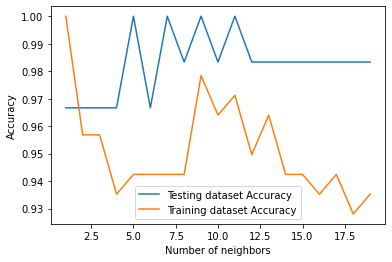

In [147]:
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_k0b = train_X0b.values
x_test_k0b = test_X0b.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_knorm0b = min_max_scaler.fit_transform(x_train_k0b)
x_test_knorm0b = min_max_scaler.fit_transform(x_test_k0b)
#x_validation_knorm1 = min_max_scaler.fit_transform(x_validation_k1)

neighbors = np.arange(1, 20)
knn_train_accuracy = np.empty(len(neighbors))
knn_test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_knorm0b, train_Y0b)
     
    # Compute training and test data accuracy
    knn_train_accuracy[i] = knn.score(x_train_knorm0b, train_Y0b)
    knn_test_accuracy[i] = knn.score(x_test_knorm0b, test_Y0b)
 
# Generate plot
plt.plot(neighbors, knn_test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, knn_train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [148]:

knn_10 = KNeighborsClassifier(n_neighbors=10)

knn_10.fit(x_train_knorm0b, train_Y0b)

# Predict on dataset which model has not seen before
knn_predict_train_0b = knn_10.predict(x_train_knorm0b)

print('Confusion Matrix for Train data:')
print(confusion_matrix(train_Y0b, knn_predict_train_0b))
print('\nClassification Report')
print(classification_report(train_Y0b, knn_predict_train_0b))
print("\nAccuracy Score on train set:")
print(knn_10.score(x_train_knorm0b, train_Y0b))
 
# Predict on dataset which model has not seen before
knn_predict_test0b = knn_10.predict(x_test_knorm0b)

print('Confusion Matrix for Test data:')
print(confusion_matrix(test_Y0b, knn_predict_test0b))
print('\nClassification Report')
print(classification_report(test_Y0b, knn_predict_test0b))
print("\nAccuracy Score on test set:")
print(knn_10.score(x_test_knorm0b, test_Y0b))

# ROC & AUC
auc0b = np.round(roc_auc_score(test_Y0b, knn_predict_test0b), 3)
 
print("AUC for our sample data is {}". format(auc0b))

Confusion Matrix for Train data:
[[49  0]
 [ 5 85]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        49
           1       1.00      0.94      0.97        90

    accuracy                           0.96       139
   macro avg       0.95      0.97      0.96       139
weighted avg       0.97      0.96      0.96       139


Accuracy Score on train set:
0.9640287769784173
Confusion Matrix for Test data:
[[23  0]
 [ 1 36]]

Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.97      0.99        37

    accuracy                           0.98        60
   macro avg       0.98      0.99      0.98        60
weighted avg       0.98      0.98      0.98        60


Accuracy Score on test set:
0.9833333333333333
AUC for our sample data is 0.986


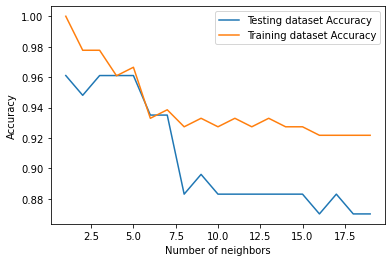

In [149]:
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_k1 = train_X1.values
x_test_k1 = test_X1.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_knorm1 = min_max_scaler.fit_transform(x_train_k1)
x_test_knorm1 = min_max_scaler.fit_transform(x_test_k1)

neighbors = np.arange(1, 20)
knn_train_accuracy = np.empty(len(neighbors))
knn_test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_knorm1, train_Y1)
     
    # Compute training and test data accuracy
    knn_train_accuracy[i] = knn.score(x_train_knorm1, train_Y1)
    knn_test_accuracy[i] = knn.score(x_test_knorm1, test_Y1)
 
# Generate plot
plt.plot(neighbors, knn_test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, knn_train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [151]:

knn_5 = KNeighborsClassifier(n_neighbors=5)

knn_5.fit(x_train_knorm1, train_Y1)

# Predict on dataset which model has not seen before
knn_predict_train_1 = knn_5.predict(x_train_knorm1)

print('Confusion Matrix for Train data:')
print(confusion_matrix(train_Y1, knn_predict_train_1))
print('\nClassification Report')
print(classification_report(train_Y1, knn_predict_train_1))
print("\nAccuracy Score on train set:")
print(knn_5.score(x_train_knorm1, train_Y1))
 
# Predict on dataset which model has not seen before
knn_predict_test1 = knn_5.predict(x_test_knorm1)

print('Confusion Matrix for Test data:')
print(confusion_matrix(test_Y1, knn_predict_test1))
print('\nClassification Report')
print(classification_report(test_Y1, knn_predict_test1))
print("\nAccuracy Score on test set:")
print(knn_5.score(x_test_knorm1, test_Y1))

# ROC & AUC
auc1 = np.round(roc_auc_score(test_Y1, knn_predict_test1), 3)
 
print("AUC for our sample data is {}". format(auc1))

Confusion Matrix for Train data:
[[99  0]
 [ 6 74]]

Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        99
           1       1.00      0.93      0.96        80

    accuracy                           0.97       179
   macro avg       0.97      0.96      0.97       179
weighted avg       0.97      0.97      0.97       179


Accuracy Score on train set:
0.9664804469273743
Confusion Matrix for Test data:
[[29  0]
 [ 3 45]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        29
           1       1.00      0.94      0.97        48

    accuracy                           0.96        77
   macro avg       0.95      0.97      0.96        77
weighted avg       0.96      0.96      0.96        77


Accuracy Score on test set:
0.961038961038961
AUC for our sample data is 0.969


In [152]:
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_k2 = train_X2.values
x_test_k2 = test_X2.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_knorm2 = min_max_scaler.fit_transform(x_train_k2)
x_test_knorm2 = min_max_scaler.fit_transform(x_test_k2)


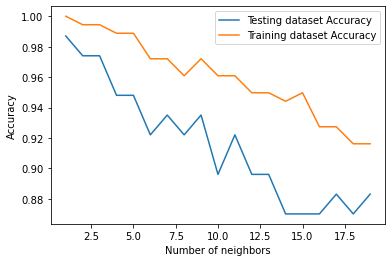

In [153]:
neighbors = np.arange(1, 20)
knn_train_accuracy = np.empty(len(neighbors))
knn_test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_knorm2, train_Y2)
     
    # Compute training and test data accuracy
    knn_train_accuracy[i] = knn.score(x_train_knorm2, train_Y2)
    knn_test_accuracy[i] = knn.score(x_test_knorm2, test_Y2)
 
# Generate plot
plt.plot(neighbors, knn_test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, knn_train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [154]:

knn_5 = KNeighborsClassifier(n_neighbors=5)

knn_5.fit(x_train_knorm2, train_Y2)

# Predict on dataset which model has not seen before
knn_predict_train_2 = knn_5.predict(x_train_knorm2)

print('Confusion Matrix for Train data:')
print(confusion_matrix(train_Y2, knn_predict_train_2))
print('\nClassification Report')
print(classification_report(train_Y2, knn_predict_train_2))
print("\nAccuracy Score on train set:")
print(knn_5.score(x_train_knorm2, train_Y2))
 
# Predict on dataset which model has not seen before
knn_predict_test2 = knn_5.predict(x_test_knorm2)

print('Confusion Matrix for Test data:')
print(confusion_matrix(test_Y2, knn_predict_test2))
print('\nClassification Report')
print(classification_report(test_Y2, knn_predict_test2))
print("\nAccuracy Score on test set:")
print(knn_5.score(x_test_knorm2, test_Y2))

# ROC & AUC
auc2 = np.round(roc_auc_score(test_Y2, knn_predict_test2), 3)
 
print("AUC for our sample data is {}". format(auc2))

Confusion Matrix for Train data:
[[99  0]
 [ 2 78]]

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        99
           1       1.00      0.97      0.99        80

    accuracy                           0.99       179
   macro avg       0.99      0.99      0.99       179
weighted avg       0.99      0.99      0.99       179


Accuracy Score on train set:
0.9888268156424581
Confusion Matrix for Test data:
[[29  0]
 [ 4 44]]

Classification Report
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        29
           1       1.00      0.92      0.96        48

    accuracy                           0.95        77
   macro avg       0.94      0.96      0.95        77
weighted avg       0.95      0.95      0.95        77


Accuracy Score on test set:
0.948051948051948
AUC for our sample data is 0.958


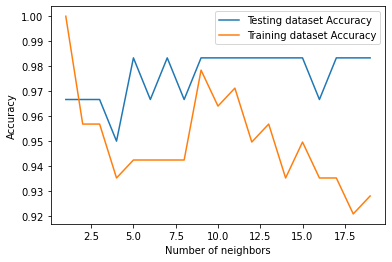

In [155]:
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_k3 = train_X3.values
x_test_k3 = test_X3.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_knorm3 = min_max_scaler.fit_transform(x_train_k3)
x_test_knorm3 = min_max_scaler.fit_transform(x_test_k3)

neighbors = np.arange(1, 20)
knn_train_accuracy = np.empty(len(neighbors))
knn_test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_knorm3, train_Y3)
     
    # Compute training and test data accuracy
    knn_train_accuracy[i] = knn.score(x_train_knorm3, train_Y3)
    knn_test_accuracy[i] = knn.score(x_test_knorm3, test_Y3)
 
# Generate plot
plt.plot(neighbors, knn_test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, knn_train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [156]:

knn_10 = KNeighborsClassifier(n_neighbors=10)

knn_10.fit(x_train_knorm3, train_Y3)

# Predict on dataset which model has not seen before
knn_predict_train_3 = knn_10.predict(x_train_knorm3)

print('Confusion Matrix for Train data:')
print(confusion_matrix(train_Y3, knn_predict_train_3))
print('\nClassification Report')
print(classification_report(train_Y3, knn_predict_train_3))
print("\nAccuracy Score on train set:")
print(knn_10.score(x_train_knorm3, train_Y3))
 
# Predict on dataset which model has not seen before
knn_predict_test3 = knn_10.predict(x_test_knorm3)

print('Confusion Matrix for Test data:')
print(confusion_matrix(test_Y3, knn_predict_test3))
print('\nClassification Report')
print(classification_report(test_Y3, knn_predict_test3))
print("\nAccuracy Score on test set:")
print(knn_10.score(x_test_knorm3, test_Y3))

# ROC & AUC
auc3 = np.round(roc_auc_score(test_Y3, knn_predict_test3), 3)
 
print("AUC for our sample data is {}". format(auc3))

Confusion Matrix for Train data:
[[49  0]
 [ 5 85]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        49
           1       1.00      0.94      0.97        90

    accuracy                           0.96       139
   macro avg       0.95      0.97      0.96       139
weighted avg       0.97      0.96      0.96       139


Accuracy Score on train set:
0.9640287769784173
Confusion Matrix for Test data:
[[23  0]
 [ 1 36]]

Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.97      0.99        37

    accuracy                           0.98        60
   macro avg       0.98      0.99      0.98        60
weighted avg       0.98      0.98      0.98        60


Accuracy Score on test set:
0.9833333333333333
AUC for our sample data is 0.986


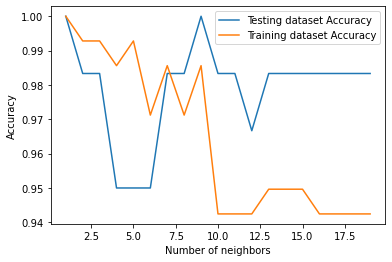

In [158]:
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_k4 = train_X4.values
x_test_k4 = test_X4.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_knorm4 = min_max_scaler.fit_transform(x_train_k4)
x_test_knorm4 = min_max_scaler.fit_transform(x_test_k4)

neighbors = np.arange(1, 20)
knn_train_accuracy = np.empty(len(neighbors))
knn_test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_knorm4, train_Y4)
     
    # Compute training and test data accuracy
    knn_train_accuracy[i] = knn.score(x_train_knorm4, train_Y4)
    knn_test_accuracy[i] = knn.score(x_test_knorm4, test_Y4)
 
# Generate plot
plt.plot(neighbors, knn_test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, knn_train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [159]:

knn_10 = KNeighborsClassifier(n_neighbors=10)

knn_10.fit(x_train_knorm4, train_Y4)

# Predict on dataset which model has not seen before
knn_predict_train_4 = knn_10.predict(x_train_knorm4)

print('Confusion Matrix for Train data:')
print(confusion_matrix(train_Y4, knn_predict_train_4))
print('\nClassification Report')
print(classification_report(train_Y4, knn_predict_train_4))
print("\nAccuracy Score on train set:")
print(knn_10.score(x_train_knorm4, train_Y4))
 
# Predict on dataset which model has not seen before
knn_predict_test4 = knn_10.predict(x_test_knorm4)

print('Confusion Matrix for Test data:')
print(confusion_matrix(test_Y4, knn_predict_test4))
print('\nClassification Report')
print(classification_report(test_Y4, knn_predict_test4))
print("\nAccuracy Score on test set:")
print(knn_10.score(x_test_knorm4, test_Y4))

# ROC & AUC
auc4 = np.round(roc_auc_score(test_Y4, knn_predict_test4), 3)
 
print("AUC for our sample data is {}". format(auc4))

Confusion Matrix for Train data:
[[49  0]
 [ 8 82]]

Classification Report
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        49
           1       1.00      0.91      0.95        90

    accuracy                           0.94       139
   macro avg       0.93      0.96      0.94       139
weighted avg       0.95      0.94      0.94       139


Accuracy Score on train set:
0.9424460431654677
Confusion Matrix for Test data:
[[23  0]
 [ 1 36]]

Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.97      0.99        37

    accuracy                           0.98        60
   macro avg       0.98      0.99      0.98        60
weighted avg       0.98      0.98      0.98        60


Accuracy Score on test set:
0.9833333333333333
AUC for our sample data is 0.986


## Machine Learning Algorithm: Support Vector Machines

In [161]:
# scale data
# Normalize the data for SVM implementation

# returns a numpy array of the dataframe
x_train_sv0 = train_X0.values
x_test_sv0 = test_X0.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_svnorm0 = min_max_scaler.fit_transform(x_train_sv0)
x_test_svnorm0 = min_max_scaler.fit_transform(x_test_sv0)

# Baseline dataframe

# train the model on train set
svm_model =  svm.SVC()
svm_model.fit(x_train_svnorm0, train_Y0)
 
# print prediction results
print('Train data results:\n')
svm_prediction0 = svm_model.predict(x_train_svnorm0)
print(classification_report(train_Y0, svm_prediction0))

print('Test data results:\n')
svm_prediction0 = svm_model.predict(x_test_svnorm0)
print(classification_report(test_Y0, svm_prediction0))

Train data results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        86

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

Test data results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        42

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [163]:
# scale data
# Normalize the data for SVM implementation

# returns a numpy array of the dataframe
x_train_sv0a = train_X0a.values
x_test_sv0a = test_X0a.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_svnorm0a = min_max_scaler.fit_transform(x_train_sv0a)
x_test_svnorm0a = min_max_scaler.fit_transform(x_test_sv0a)

# Baseline dataframe

# train the model on train set
svm_model =  svm.SVC()
svm_model.fit(x_train_svnorm0a, train_Y0a)
 
# print prediction results
print('Train data results:\n')
svm_prediction0a = svm_model.predict(x_train_svnorm0a)
print(classification_report(train_Y0a, svm_prediction0a))

print('Test data results:\n')
svm_prediction0a = svm_model.predict(x_test_svnorm0a)
print(classification_report(test_Y0a, svm_prediction0a))

Train data results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00        80

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179

Test data results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        48

    accuracy                           1.00        77
   macro avg       1.00      1.00      1.00        77
weighted avg       1.00      1.00      1.00        77



In [166]:
# scale data
# Normalize the data for SVM implementation

# returns a numpy array of the dataframe
x_train_sv0b = train_X0b.values
x_test_sv0b = test_X0b.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_svnorm0b = min_max_scaler.fit_transform(x_train_sv0b)
x_test_svnorm0b = min_max_scaler.fit_transform(x_test_sv0b)

# Baseline dataframe

# train the model on train set
svm_model =  svm.SVC()
svm_model.fit(x_train_svnorm0b, train_Y0b)
 
# print prediction results
print('Train data results:\n')
svm_prediction0b = svm_model.predict(x_train_svnorm0b)
print(classification_report(train_Y0b, svm_prediction0b))

print('Test data results:\n')
svm_prediction0b = svm_model.predict(x_test_svnorm0b)
print(classification_report(test_Y0b, svm_prediction0b))

Train data results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        90

    accuracy                           1.00       139
   macro avg       1.00      1.00      1.00       139
weighted avg       1.00      1.00      1.00       139

Test data results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        37

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [167]:
# Dataframe 1

# scale data
# Normalize the data for SVM implementation

# returns a numpy array of the dataframe
x_train_sv1 = train_X1.values
x_test_sv1 = test_X1.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_svnorm1 = min_max_scaler.fit_transform(x_train_sv1)
x_test_svnorm1 = min_max_scaler.fit_transform(x_test_sv1)

# Baseline data

# train the model on train set
svm_model.fit(x_train_svnorm1, train_Y1)
 
# print prediction results
print('Train data results:\n')
svm_prediction1 = svm_model.predict(x_train_svnorm1)
print(classification_report(train_Y1, svm_prediction1))

print('Test data results:\n')
svm_prediction1 = svm_model.predict(x_test_svnorm1)
print(classification_report(test_Y1, svm_prediction1))

Train data results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00        80

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179

Test data results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        48

    accuracy                           1.00        77
   macro avg       1.00      1.00      1.00        77
weighted avg       1.00      1.00      1.00        77



In [168]:
# Dataframe 2

# scale data
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_sv2 = train_X2.values
x_test_sv2 = test_X2.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_svnorm2 = min_max_scaler.fit_transform(x_train_sv2)
x_test_svnorm2 = min_max_scaler.fit_transform(x_test_sv2)

# Baseline data

# train the model on train set
svm_model.fit(x_train_svnorm2, train_Y2)
 
# print prediction results
print('Train data results:\n')
svm_prediction2 = svm_model.predict(x_train_svnorm2)
print(classification_report(train_Y2, svm_prediction2))

print('Test data results:\n')
svm_prediction2 = svm_model.predict(x_test_svnorm2)
print(classification_report(test_Y2, svm_prediction2))

Train data results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00        80

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179

Test data results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        48

    accuracy                           1.00        77
   macro avg       1.00      1.00      1.00        77
weighted avg       1.00      1.00      1.00        77



In [169]:
# Dataframe 3

# scale data
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_sv3 = train_X3.values
x_test_sv3 = test_X3.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_svnorm3 = min_max_scaler.fit_transform(x_train_sv3)
x_test_svnorm3 = min_max_scaler.fit_transform(x_test_sv3)

# Baseline data

# train the model on train set
svm_model.fit(x_train_svnorm3, train_Y3)
 
# print prediction results
print('Train data results:\n')
svm_prediction3 = svm_model.predict(x_train_svnorm3)
print(classification_report(train_Y3, svm_prediction3))

print('Test data results:\n')
svm_prediction3 = svm_model.predict(x_test_svnorm3)
print(classification_report(test_Y3, svm_prediction3))

Train data results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        90

    accuracy                           1.00       139
   macro avg       1.00      1.00      1.00       139
weighted avg       1.00      1.00      1.00       139

Test data results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        37

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [170]:
# Dataframe 4

# scale data
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_sv4 = train_X4.values
x_test_sv4 = test_X4.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_svnorm4 = min_max_scaler.fit_transform(x_train_sv4)
x_test_svnorm4 = min_max_scaler.fit_transform(x_test_sv4)

# Baseline data

# train the model on train set
svm_model.fit(x_train_svnorm4, train_Y4)
 
# print prediction results
print('Train data results:\n')
svm_prediction4 = svm_model.predict(x_train_svnorm4)
print(classification_report(train_Y4, svm_prediction4))

print('Test data results:\n')
svm_prediction4 = svm_model.predict(x_test_svnorm4)
print(classification_report(test_Y4, svm_prediction4))

Train data results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        90

    accuracy                           1.00       139
   macro avg       1.00      1.00      1.00       139
weighted avg       1.00      1.00      1.00       139

Test data results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        37

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



## Machine Learning Algorithm: Logistic Regression

In [172]:
# define model
lr_model = LogisticRegression()

### Dataframe baseline

In [177]:
# fitting model
lr_model.fit(train_X0, train_Y0)

# Predict on dataset which model has not seen before
lr_train_predict0 = lr_model.predict(train_X0)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y0, lr_train_predict0))
print('\nClassification Report')
print(classification_report(train_Y0, lr_train_predict0))
print("\nAccuracy Score on train set:")
print(lr_model.score(train_X0, train_Y0))

# Predict on dataset which model has not seen before
lr_test_predict0 = lr_model.predict(test_X0)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y0, lr_test_predict0))
print('\nClassification Report')
print(classification_report(test_Y0, lr_test_predict0))
print("\nAccuracy Score on test set:")
print(lr_model.score(test_X0, test_Y0))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[54  0]
 [ 0 86]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        86

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140


Accuracy Score on train set:
1.0


Resulting performance on TEST SET:
Confusion Matrix:
[[18  0]
 [ 0 42]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        42

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


Accuracy Score on test set:
1.0


In [178]:
# fitting model
lr_model.fit(train_X0a, train_Y0a)

# Predict on dataset which model has not seen before
lr_train_predict0a = lr_model.predict(train_X0a)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y0a, lr_train_predict0a))
print('\nClassification Report')
print(classification_report(train_Y0a, lr_train_predict0a))
print("\nAccuracy Score on train set:")
print(lr_model.score(train_X0a, train_Y0a))

# Predict on dataset which model has not seen before
lr_test_predict0a = lr_model.predict(test_X0a)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y0a, lr_test_predict0a))
print('\nClassification Report')
print(classification_report(test_Y0a, lr_test_predict0a))
print("\nAccuracy Score on test set:")
print(lr_model.score(test_X0a, test_Y0a))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[99  0]
 [ 0 80]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00        80

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179


Accuracy Score on train set:
1.0


Resulting performance on TEST SET:
Confusion Matrix:
[[29  0]
 [ 0 48]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        48

    accuracy                           1.00        77
   macro avg       1.00      1.00      1.00        77
weighted avg       1.00      1.00      1.00        77


Accuracy Score on test set:
1.0


In [179]:
# fitting model
lr_model.fit(train_X0b, train_Y0b)

# Predict on dataset which model has not seen before
lr_train_predict0b = lr_model.predict(train_X0b)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y0b, lr_train_predict0b))
print('\nClassification Report')
print(classification_report(train_Y0b, lr_train_predict0b))
print("\nAccuracy Score on train set:")
print(lr_model.score(train_X0b, train_Y0b))

# Predict on dataset which model has not seen before
lr_test_predict0b = lr_model.predict(test_X0b)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y0b, lr_test_predict0b))
print('\nClassification Report')
print(classification_report(test_Y0b, lr_test_predict0b))
print("\nAccuracy Score on test set:")
print(lr_model.score(test_X0b, test_Y0b))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[49  0]
 [ 0 90]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        90

    accuracy                           1.00       139
   macro avg       1.00      1.00      1.00       139
weighted avg       1.00      1.00      1.00       139


Accuracy Score on train set:
1.0


Resulting performance on TEST SET:
Confusion Matrix:
[[23  0]
 [ 0 37]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        37

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


Accuracy Score on test set:
1.0


In [180]:
lr_model.fit(train_X1, train_Y1)

# Predict on dataset which model has not seen before
lr_train_predict1 = lr_model.predict(train_X1)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y1, lr_train_predict1))
print('\nClassification Report')
print(classification_report(train_Y1, lr_train_predict1))
print("\nAccuracy Score on test set:")
print(lr_model.score(train_X1, train_Y1))

# Predict on dataset which model has not seen before
lr_test_predict1 = lr_model.predict(test_X1)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y1, lr_test_predict1))
print('\nClassification Report')
print(classification_report(test_Y1, lr_test_predict1))
print("\nAccuracy Score on test set:")
print(lr_model.score(test_X1, test_Y1))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[99  0]
 [ 0 80]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00        80

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179


Accuracy Score on test set:
1.0


Resulting performance on TEST SET:
Confusion Matrix:
[[29  0]
 [ 0 48]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        48

    accuracy                           1.00        77
   macro avg       1.00      1.00      1.00        77
weighted avg       1.00      1.00      1.00        77


Accuracy Score on test set:
1.0


In [181]:
lr_model.fit(train_X2, train_Y2) # fitting baseline model

# Predict on train dataset which model has not seen before
lr_train_predict2 = lr_model.predict(train_X2)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y2, lr_train_predict2))
print('\nClassification Report')
print(classification_report(train_Y2, lr_train_predict2))
print("\nAccuracy Score on test set:")
print(lr_model.score(train_X2, train_Y2))

# Predict on dataset which model has not seen before
lr_test_predict2 = lr_model.predict(test_X2)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y2, lr_test_predict2))
print('\nClassification Report')
print(classification_report(test_Y2, lr_test_predict2))
print("\nAccuracy Score on test set:")
print(lr_model.score(test_X2, test_Y2))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[99  0]
 [ 0 80]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00        80

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179


Accuracy Score on test set:
1.0


Resulting performance on TEST SET:
Confusion Matrix:
[[29  0]
 [ 0 48]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        48

    accuracy                           1.00        77
   macro avg       1.00      1.00      1.00        77
weighted avg       1.00      1.00      1.00        77


Accuracy Score on test set:
1.0


In [183]:
lr_model.fit(train_X3, train_Y3) # fitting baseline model

# Predict on train dataset which model has not seen before
lr_train_predict3 = lr_model.predict(train_X3)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y3, lr_train_predict3))
print('\nClassification Report')
print(classification_report(train_Y3, lr_train_predict3))
print("\nAccuracy Score on test set:")
print(lr_model.score(train_X3, train_Y3))

# Predict on dataset which model has not seen before
lr_test_predict3 = lr_model.predict(test_X3)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y3, lr_test_predict3))
print('\nClassification Report')
print(classification_report(test_Y3, lr_test_predict3))
print("\nAccuracy Score on test set:")
print(lr_model.score(test_X3, test_Y3))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[49  0]
 [ 0 90]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        90

    accuracy                           1.00       139
   macro avg       1.00      1.00      1.00       139
weighted avg       1.00      1.00      1.00       139


Accuracy Score on test set:
1.0


Resulting performance on TEST SET:
Confusion Matrix:
[[23  0]
 [ 0 37]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        37

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


Accuracy Score on test set:
1.0


In [182]:
lr_model.fit(train_X4, train_Y4) # fitting baseline model

# Predict on train dataset which model has not seen before
lr_train_predict4 = lr_model.predict(train_X4)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y4, lr_train_predict4))
print('\nClassification Report')
print(classification_report(train_Y4, lr_train_predict4))
print("\nAccuracy Score on test set:")
print(lr_model.score(train_X4, train_Y4))

# Predict on dataset which model has not seen before
lr_test_predict4 = lr_model.predict(test_X4)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y4, lr_test_predict4))
print('\nClassification Report')
print(classification_report(test_Y4, lr_test_predict4))
print("\nAccuracy Score on test set:")
print(lr_model.score(test_X4, test_Y4))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[49  0]
 [ 0 90]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        90

    accuracy                           1.00       139
   macro avg       1.00      1.00      1.00       139
weighted avg       1.00      1.00      1.00       139


Accuracy Score on test set:
1.0


Resulting performance on TEST SET:
Confusion Matrix:
[[23  0]
 [ 0 37]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        37

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


Accuracy Score on test set:
1.0


## Machine Learning Algorithm: Multilayer Perceptron (MLP) Classifier

In [184]:
# define model
mlp_model = MLPClassifier()

### Dataframe baseline

In [185]:
# fitting model
mlp_model.fit(train_X0, train_Y0)

# Predict on dataset which model has not seen before
mlp_predict0 = mlp_model.predict(train_X0)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y0, mlp_predict0))
print('\nClassification Report')
print(classification_report(train_Y0, mlp_predict0))
print("\nAccuracy Score on train set:")
print(mlp_model.score(train_X0, train_Y0))

# Predict on dataset which model has not seen before
mlp_predict0 = mlp_model.predict(test_X0)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y0, mlp_predict0))
print('\nClassification Report')
print(classification_report(test_Y0, mlp_predict0))
print("\nAccuracy Score on test set:")
print(mlp_model.score(test_X0, test_Y0))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[54  0]
 [ 0 86]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        86

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140


Accuracy Score on train set:
1.0


Resulting performance on TEST SET:
Confusion Matrix:
[[18  0]
 [ 0 42]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        42

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


Accuracy Score on test set:
1.0


In [187]:
# fitting model
mlp_model.fit(train_X0a, train_Y0a)

# Predict on dataset which model has not seen before
mlp_predict0a = mlp_model.predict(train_X0a)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y0a, mlp_predict0a))
print('\nClassification Report')
print(classification_report(train_Y0a, mlp_predict0a))
print("\nAccuracy Score on train set:")
print(mlp_model.score(train_X0a, train_Y0a))

# Predict on dataset which model has not seen before
mlp_predict0a = mlp_model.predict(test_X0a)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y0a, mlp_predict0a))
print('\nClassification Report')
print(classification_report(test_Y0a, mlp_predict0a))
print("\nAccuracy Score on test set:")
print(mlp_model.score(test_X0a, test_Y0a))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[99  0]
 [ 1 79]]

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        99
           1       1.00      0.99      0.99        80

    accuracy                           0.99       179
   macro avg       0.99      0.99      0.99       179
weighted avg       0.99      0.99      0.99       179


Accuracy Score on train set:
0.994413407821229


Resulting performance on TEST SET:
Confusion Matrix:
[[29  0]
 [ 1 47]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.98      0.99        48

    accuracy                           0.99        77
   macro avg       0.98      0.99      0.99        77
weighted avg       0.99      0.99      0.99        77


Accuracy Score on test set:
0.987012987012987


In [188]:
# fitting model
mlp_model.fit(train_X0b, train_Y0b)

# Predict on dataset which model has not seen before
mlp_predict0b = mlp_model.predict(train_X0b)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y0b, mlp_predict0b))
print('\nClassification Report')
print(classification_report(train_Y0b, mlp_predict0b))
print("\nAccuracy Score on train set:")
print(mlp_model.score(train_X0b, train_Y0b))

# Predict on dataset which model has not seen before
mlp_predict0b = mlp_model.predict(test_X0b)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y0b, mlp_predict0b))
print('\nClassification Report')
print(classification_report(test_Y0b, mlp_predict0b))
print("\nAccuracy Score on test set:")
print(mlp_model.score(test_X0b, test_Y0b))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[49  0]
 [ 1 89]]

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        49
           1       1.00      0.99      0.99        90

    accuracy                           0.99       139
   macro avg       0.99      0.99      0.99       139
weighted avg       0.99      0.99      0.99       139


Accuracy Score on train set:
0.9928057553956835


Resulting performance on TEST SET:
Confusion Matrix:
[[23  0]
 [ 0 37]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        37

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


Accuracy Score on test set:
1.0


In [189]:
mlp_model.fit(train_X1, train_Y1)

# Predict on dataset which model has not seen before
mlp_predict1 = mlp_model.predict(train_X1)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y1, mlp_predict1))
print('\nClassification Report')
print(classification_report(train_Y1, mlp_predict1))
print("\nAccuracy Score on test set:")
print(mlp_model.score(train_X1, train_Y1))

# Predict on dataset which model has not seen before
mlp_predict1 = mlp_model.predict(test_X1)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y1, mlp_predict1))
print('\nClassification Report')
print(classification_report(test_Y1, mlp_predict1))
print("\nAccuracy Score on test set:")
print(mlp_model.score(test_X1, test_Y1))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[99  0]
 [ 1 79]]

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        99
           1       1.00      0.99      0.99        80

    accuracy                           0.99       179
   macro avg       0.99      0.99      0.99       179
weighted avg       0.99      0.99      0.99       179


Accuracy Score on test set:
0.994413407821229


Resulting performance on TEST SET:
Confusion Matrix:
[[29  0]
 [ 1 47]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.98      0.99        48

    accuracy                           0.99        77
   macro avg       0.98      0.99      0.99        77
weighted avg       0.99      0.99      0.99        77


Accuracy Score on test set:
0.987012987012987


In [190]:
mlp_model.fit(train_X2, train_Y2) # fitting baseline model

# Predict on train dataset which model has not seen before
mlp_predict2 = mlp_model.predict(train_X2)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y2, mlp_predict2))
print('\nClassification Report')
print(classification_report(train_Y2, mlp_predict2))
print("\nAccuracy Score on test set:")
print(mlp_model.score(train_X2, train_Y2))

# Predict on dataset which model has not seen before
mlp_predict2 = mlp_model.predict(test_X2)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y2, mlp_predict2))
print('\nClassification Report')
print(classification_report(test_Y2, mlp_predict2))
print("\nAccuracy Score on test set:")
print(mlp_model.score(test_X2, test_Y2))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[99  0]
 [ 1 79]]

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        99
           1       1.00      0.99      0.99        80

    accuracy                           0.99       179
   macro avg       0.99      0.99      0.99       179
weighted avg       0.99      0.99      0.99       179


Accuracy Score on test set:
0.994413407821229


Resulting performance on TEST SET:
Confusion Matrix:
[[29  0]
 [ 1 47]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.98      0.99        48

    accuracy                           0.99        77
   macro avg       0.98      0.99      0.99        77
weighted avg       0.99      0.99      0.99        77


Accuracy Score on test set:
0.987012987012987


In [191]:
mlp_model.fit(train_X3, train_Y3) # fitting baseline model

# Predict on train dataset which model has not seen before
mlp_predict3 = mlp_model.predict(train_X3)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y3, mlp_predict3))
print('\nClassification Report')
print(classification_report(train_Y3, mlp_predict3))
print("\nAccuracy Score on test set:")
print(mlp_model.score(train_X3, train_Y3))

# Predict on dataset which model has not seen before
mlp_predict3 = mlp_model.predict(test_X3)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y3, mlp_predict3))
print('\nClassification Report')
print(classification_report(test_Y3, mlp_predict3))
print("\nAccuracy Score on test set:")
print(mlp_model.score(test_X3, test_Y3))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[49  0]
 [ 0 90]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        90

    accuracy                           1.00       139
   macro avg       1.00      1.00      1.00       139
weighted avg       1.00      1.00      1.00       139


Accuracy Score on test set:
1.0


Resulting performance on TEST SET:
Confusion Matrix:
[[23  0]
 [ 0 37]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        37

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


Accuracy Score on test set:
1.0


In [192]:
mlp_model.fit(train_X4, train_Y4) # fitting baseline model

# Predict on train dataset which model has not seen before
mlp_predict4 = mlp_model.predict(train_X4)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y4, mlp_predict4))
print('\nClassification Report')
print(classification_report(train_Y4, mlp_predict4))
print("\nAccuracy Score on test set:")
print(mlp_model.score(train_X4, train_Y4))

# Predict on dataset which model has not seen before
mlp_predict4 = mlp_model.predict(test_X4)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y4, mlp_predict4))
print('\nClassification Report')
print(classification_report(test_Y4, mlp_predict4))
print("\nAccuracy Score on test set:")
print(mlp_model.score(test_X4, test_Y4))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[49  0]
 [ 0 90]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        90

    accuracy                           1.00       139
   macro avg       1.00      1.00      1.00       139
weighted avg       1.00      1.00      1.00       139


Accuracy Score on test set:
1.0


Resulting performance on TEST SET:
Confusion Matrix:
[[23  0]
 [ 1 36]]

Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.97      0.99        37

    accuracy                           0.98        60
   macro avg       0.98      0.99      0.98        60
weighted avg       0.98      0.98      0.98        60


Accuracy Score on test set:
0.9833333333333333
